# Project 3 - Kaggle House Prices: Advanced Regression Techniques


## Submitted by: Dror Vered

### September 2018

Data set contains information of individual residential properties sold in Ames, Iowa between the years 2006 and 2010.
The goal of this project is to predict the sales price for each house.
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

-----------------------------------------------------------------------------------------------------------------------------

### My Work Plan:

- Get familiar with the given features, explore the dataset, perform visualization
- Apply data-related and model-related pre-processing steps as necessary
- Apply several relevant models
- Present final (best) results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_log_error, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import pipeline
import missingno as msno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## 1. Reading the files and creating the appropriate DataFrames

In [2]:
train_csv = pd.read_csv('train.csv')
test_csv = pd.read_csv('test.csv')

In [3]:
train_csv.shape, test_csv.shape

((1616, 80), (796, 79))

In [4]:
train_len = train_csv.shape[0]

In [5]:
train_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
0,0,120,RL,50.0,7175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2009,WD,145000
1,1,120,RH,34.0,4058,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,133000
2,2,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2006,WD,130000
3,3,60,RL,60.0,21930,Pave,NaN,IR3,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,7,2006,WD,192140
4,4,80,RL,75.0,13860,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,7,2009,WD,345000


In [6]:
test_csv.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
0,1616,20,RL,62.0,9858,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,GdWo,Shed,600,11,2009,WD
1,1617,190,RL,62.0,10106,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2008,WD
2,1618,90,RL,75.0,8250,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,5,2009,WD
3,1619,90,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,6,2009,WD
4,1620,20,RL,76.0,8314,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,6,2007,WD


In [7]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 80 columns):
Id               1616 non-null int64
MSSubClass       1616 non-null int64
MSZoning         1616 non-null object
LotFrontage      1319 non-null float64
LotArea          1616 non-null int64
Street           1616 non-null object
Alley            99 non-null object
LotShape         1616 non-null object
LandContour      1616 non-null object
Utilities        1616 non-null object
LotConfig        1616 non-null object
LandSlope        1616 non-null object
Neighborhood     1616 non-null object
Condition1       1616 non-null object
Condition2       1616 non-null object
BldgType         1616 non-null object
HouseStyle       1616 non-null object
OverallQual      1616 non-null int64
OverallCond      1616 non-null int64
YearBuilt        1616 non-null int64
YearRemodAdd     1616 non-null int64
RoofStyle        1616 non-null object
RoofMatl         1616 non-null object
Exterior1st      1616 non-n

In [8]:
train_csv.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1616.000000,1616.000000,1319.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1609.000000,1616.000000,...,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000,1616.000000
mean,807.500000,58.001238,68.293404,9893.436262,6.001238,5.644802,1970.001238,1983.457302,92.656930,442.169554,...,97.603960,43.856436,24.219678,1.984530,14.818688,1.930693,57.264851,6.120668,2007.904084,174691.220916
std,466.643333,42.525490,22.806494,7642.751805,1.341871,1.125587,29.175693,20.269165,162.165505,414.639074,...,129.554408,61.027643,67.559890,22.343763,54.036313,31.471588,527.378886,2.659811,1.307784,69924.420140
min,0.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35000.000000
25%,403.750000,20.000000,57.000000,7289.500000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,807.500000,50.000000,68.000000,9270.000000,6.000000,5.000000,1972.000000,1991.000000,0.000000,401.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,157500.000000
75%,1211.250000,70.000000,80.000000,11243.000000,7.000000,6.000000,1998.000000,2002.000000,144.000000,717.500000,...,172.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,206925.000000
max,1615.000000,190.000000,313.000000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1159.000000,2257.000000,...,870.000000,502.000000,1012.000000,508.000000,576.000000,648.000000,15500.000000,12.000000,2010.000000,615000.000000


In [9]:
all_prices = train_csv.drop(columns='SalePrice').append(test_csv, sort=False, ignore_index=True)

In [10]:
all_prices.shape

(2412, 79)

In [11]:
# all_prices.head()

In [12]:
# all_prices.tail()

In [13]:
X_all = all_prices.drop(columns='Id')

## 2. Missing Data

### 2.1. Visualization of features with NAN values

In [14]:
def calc_NaN_columns(X_all, to_plot):
    NaN_df = (X_all.isna().sum()/X_all.isna().count()).round(5).to_frame('nan_portion'). \
         assign(nan = X_all.isna().sum()). \
         assign(not_nan = X_all.isna().count()-X_all.isna().sum()). \
         assign(dtype = X_all.dtypes). \
         sort_values(by='nan_portion', ascending=False)
    NaN_df = NaN_df[NaN_df.nan_portion > 0]
    NaN_columns = NaN_df.index.tolist()
    print(f'{len(NaN_columns)} Columns with Nulls')
    if len(NaN_columns) > 0:
        print(NaN_df)  
        if to_plot:
            NaN_df.nan_portion.plot(kind='bar', figsize=(6,4))
    return NaN_columns

21 Columns with Nulls
              nan_portion   nan  not_nan    dtype
PoolQC            0.99627  2403        9   object
MiscFeature       0.96020  2316       96   object
Alley             0.93615  2258      154   object
Fence             0.79187  1910      502   object
FireplaceQu       0.48259  1164     1248   object
LotFrontage       0.18698   451     1961  float64
GarageYrBlt       0.04851   117     2295  float64
GarageFinish      0.04851   117     2295   object
GarageQual        0.04851   117     2295   object
GarageCond        0.04851   117     2295   object
GarageType        0.04809   116     2296   object
BsmtExposure      0.02861    69     2343   object
BsmtFinType2      0.02819    68     2344   object
BsmtCond          0.02778    67     2345   object
BsmtFinType1      0.02778    67     2345   object
BsmtQual          0.02778    67     2345   object
MasVnrType        0.00456    11     2401   object
MasVnrArea        0.00456    11     2401  float64
BsmtHalfBath      0.00041   

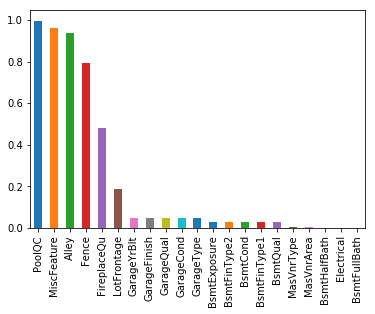

In [15]:
NaN_columns = calc_NaN_columns(X_all, True)

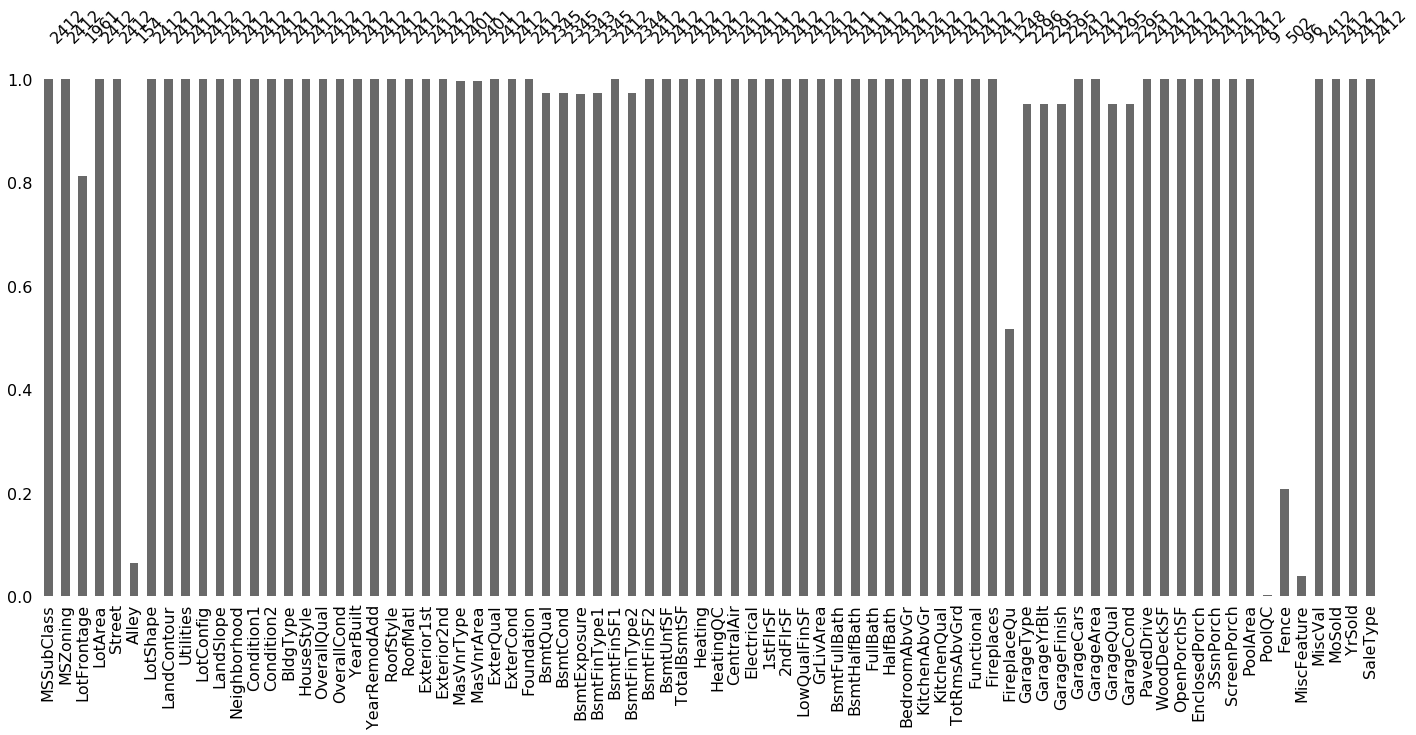

In [16]:
# another display of all features' portion of nulls
msno.bar(X_all)

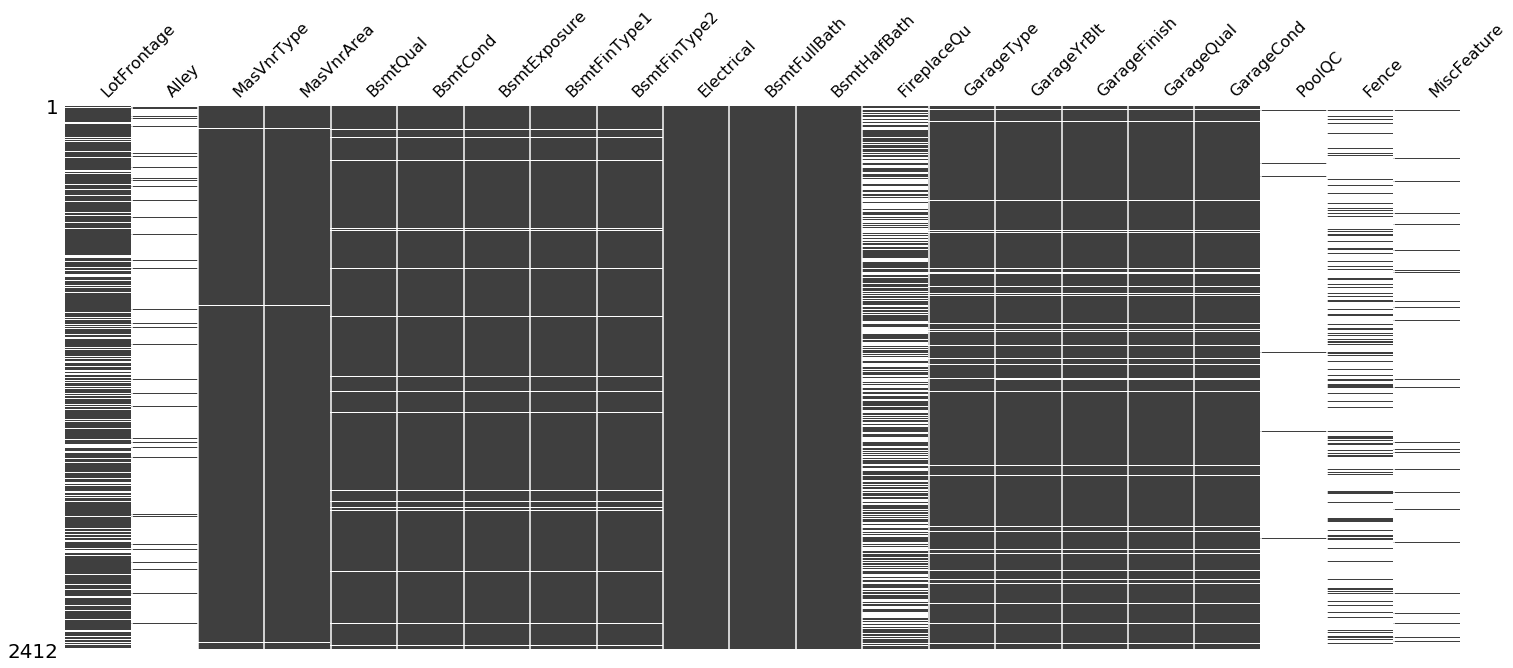

In [17]:
# displaying all the features that contain NAN values
msno.matrix(msno.nullity_filter(X_all, filter='bottom', p=0.9999), sparkline=False)

### 2.2. Imputing missing data

According to the data_description text file, **some of the missing values actually have a meaning**, which might affect the price of the house. For example, an empty value in the GarageType feature means "No Garage".

The above applies to the following features, in which I'll now convert NaN (empty) values to "NA" (categorical) value:

- **Alley** - No alley access
- **BsmtQual** - No Basement
- **BsmtCond** - No Basement
- **BsmtExposure** - No Basement
- **BsmtFinType1** - No Basement
- **BsmtFinType2** - No Basement
- **FireplaceQu** - No Fireplace
- **GarageType** - No Garage
- **GarageFinish** - No Garage
- **GarageQual** - No Garage
- **GarageCond** - No Garage
- **PoolQC** - No Pool
- **Fence** - No Fence


In [18]:
meaningful_na_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                          'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']
X_all[meaningful_na_features] = X_all[meaningful_na_features].fillna('NA')

In [19]:
NaN_columns = calc_NaN_columns(X_all, False)

8 Columns with Nulls
              nan_portion   nan  not_nan    dtype
MiscFeature       0.96020  2316       96   object
LotFrontage       0.18698   451     1961  float64
GarageYrBlt       0.04851   117     2295  float64
MasVnrType        0.00456    11     2401   object
MasVnrArea        0.00456    11     2401  float64
Electrical        0.00041     1     2411   object
BsmtFullBath      0.00041     1     2411  float64
BsmtHalfBath      0.00041     1     2411  float64


The NaN values in the remaining columns will be converted as follows:

- **MiscFeature:** to 'NA'
- **LotFrontage:** to the median value of LotFrontage of houses in the same neighborhood (if not exists - median value of all column)
- **GarageYrBlt:** 
    - I assume that if there *is* a garage, it was built in the same year of which the house to which it is attached was built. I'll firstly verify that assumption.
    - Now, in case there *is* a garage (GarageCars > 0), I'll convert the Null value to the YearBuilt value
    - In case Null values still remain, I'll convert all column's values from numbers to strings (e.g. 1960 ==> '1960') and then convert the Null values to 'None's
- **MasVnrType:**  to 'Unknown' (only 11 NaN values)
- **MasVnrArea:**  to mean value (only 11 Nan values)
- **Electrical:**  to the most frequent value (only 1 NaN value)
- **BsmtFullBath:** to median value of BsmtFullBath of houses which have identical number of FullBaths (only 1 NaN value)
- **BsmtHalfBath:** to median value of BsmtHalfBath of houses which have identical number of HalfBaths (only 1 NaN value)


**MiscFeature:**

In [20]:
X_all.MiscFeature.fillna('NA', inplace=True)

**LotFrontage:**

In [21]:
# Group by neighborhood and fill in missing value by the median LotFrontage of the neighborhood
X_all.LotFrontage = X_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# check if NaN values remain (might happen if there's a neighborhood which all its LotFrontage values are Nulls)
X_all['LotFrontage'].isnull().sum()

3

In [22]:
# convert remaining Null values to median value of the column
X_all.LotFrontage.fillna(X_all.LotFrontage.median(), inplace=True)

# varify that no NaN values remain
X_all['LotFrontage'].isnull().sum()

0

**GarageYrBlt:**

In [23]:
# verify that a garage was built in the same year of which the house to which it is attached was built.
(X_all['GarageYrBlt'] - X_all['YearBuilt']).median()

0.0

In [24]:
# in case there IS a garage (GarageCars > 0), convert Null value to YearBuilt
X_all['GarageYrBlt'][(X_all.GarageCars > 0) & (X_all.GarageYrBlt.isnull())] = X_all['YearBuilt']

In [25]:
# remaining Nulls
X_all[['GarageCars','YearBuilt','GarageYrBlt']][X_all.GarageYrBlt.isnull()].count()

GarageCars     116
YearBuilt      116
GarageYrBlt      0
dtype: int64

In [26]:
# convert remaining Nulls to 2011 (outlier) - I'll come back to this feature later
X_all.GarageYrBlt.fillna(2011, inplace=True)

**MasVnrType:**

In [27]:
X_all.MasVnrType.fillna('Unknown', inplace=True)

**MasVnrArea:**

In [28]:
X_all.MasVnrArea.fillna(X_all.MasVnrArea.mean(), inplace=True)

**Electrical:**

In [29]:
X_all.Electrical.fillna(X_all.Electrical.value_counts().index[0], inplace=True)

**BsmtFullBath:**

In [30]:
# Group by FullBath and fill in missing value by the median BsmtFullBath of that FullBath
X_all.BsmtFullBath = X_all.groupby('FullBath')['BsmtFullBath'].transform(lambda x: x.fillna(x.median()))

# check if NaN values remain 
X_all['BsmtFullBath'].isnull().sum()

0

**BsmtHalfBath:**

In [31]:
# Group by HalfBath and fill in missing value by the median BsmtHalfBath of that HalfBath
X_all.BsmtHalfBath = X_all.groupby('HalfBath')['BsmtHalfBath'].transform(lambda x: x.fillna(x.median()))

# check if NaN values remain 
X_all['BsmtHalfBath'].isnull().sum()

0

### All missing data is now completed

In [32]:
NaN_columns = calc_NaN_columns(X_all, False)

0 Columns with Nulls


In [33]:
# "backup" X_all
X_all_noNulls = X_all.copy()

In [34]:
# "restore" X_all (checkpoint)
X_all = X_all_noNulls.copy()
# X_all.info()

## 3. Feature Engineering

### 3.1. Ordinal Features

According to the data_description text file, some of the 'object' features are "ordinal", which means that their values actually have some order. I would now like to convert these features to "ordered categorical" (or "ordinal") features.

#### 3.1.1. Quality and Condition

The following features can get the values: Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor), NA (No item), None (Unknown):

- ExterCond: Evaluates the present condition of the material on the exterior
- ExterQual: Evaluates the quality of the material on the exterior
- BsmtCond: Evaluates the general condition of the basement
- BsmtQual: Evaluates the height of the basement
- HeatingQC: Heating quality and condition
- GarageCond: Garage condition
- GarageQual: Garage quality           
- KitchenQual: Kitchen quality
- FireplaceQu: Fireplace quality
- PoolQC: Pool quality

I will now convert the above features to ordinal and drop the original categorical features

In [35]:
ordered_values = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
columns = ['ExterCond', 'ExterQual', 'BsmtCond', 'BsmtQual', 'HeatingQC',
           'GarageCond', 'GarageQual', 'KitchenQual', 'FireplaceQu', 'PoolQC']
columns_ord = []
for col in columns:
    ord_col = col + '_ord'
    columns_ord.append(ord_col)
    X_all[ord_col] = X_all[col].astype("category", ordered=True, categories=ordered_values).cat.codes

In [36]:
X_all.shape

(2412, 88)

In [37]:
X_all.drop(columns=columns, inplace=True)

In [38]:
X_all.shape

(2412, 78)

In [39]:
# X_all.info()

#### 3.1.2. Rest of ordinal features 

In [40]:
def from_cat_to_ord(col, ordered_values):
    ord_col = col + '_ord'
    X_all[ord_col] = X_all[col].astype("category", ordered=True, categories=ordered_values).cat.codes
    X_all.drop(columns=col, inplace=True)

In [41]:
from_cat_to_ord('LotShape', ['IR3', 'IR2', 'IR1', 'Reg'])
from_cat_to_ord('Utilities', ['ELO', 'NoSeWa', 'NoSewr', 'AllPub'])
from_cat_to_ord('LandSlope', ['Sev', 'Mod', 'Gtl'])
from_cat_to_ord('BsmtExposure', ['NA', 'No', 'Mn', 'Av', 'Gd'])
from_cat_to_ord('BsmtFinType1', ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
from_cat_to_ord('BsmtFinType2', ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'])
from_cat_to_ord('Electrical', ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'])
from_cat_to_ord('Functional', ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])
from_cat_to_ord('GarageFinish', ['NA', 'Unf', 'RFn', 'Fin'])
from_cat_to_ord('PavedDrive', ['N', 'P', 'Y'])
from_cat_to_ord('Fence', ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'])

### 3.2 Categorical Features

The following (mostly 'object') features are "nominal" (in the data_description text file's term), or categorical: <br>
MSSubClass, MSZoning, Street, Alley, LandContour, LotConfig, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, Foundation, Heating, CentralAir, GarageType, MiscFeature, SaleType<br>

In order to explore these features later on, I will now transform them to numerical features, by using LabelEncoder().

In [42]:
X_train_csv = X_all.iloc[:train_len]
X_train_csv.shape

(1616, 78)

In [43]:
df_nominal = pd.concat([X_train_csv['MSSubClass'], 
                        X_train_csv.select_dtypes(include='object')], axis=1)
df_nominal.shape

(1616, 22)

In [44]:
df_nominal.head()

,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType,MiscFeature,SaleType
0,120,RL,Pave,NA,Lvl,Inside,SawyerW,Norm,Norm,TwnhsE,...,CompShg,Plywood,ImStucc,None,PConc,GasA,Y,Attchd,NA,WD
1,120,RH,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,TwnhsE,...,CompShg,MetalSd,MetalSd,BrkFace,PConc,GasA,Y,Attchd,NA,WD
2,160,RM,Pave,NA,Lvl,Inside,Edwards,Norm,Norm,Twnhs,...,CompShg,VinylSd,VinylSd,Stone,PConc,GasA,Y,Detchd,NA,WD
3,60,RL,Pave,NA,Lvl,Inside,Gilbert,RRAn,Norm,1Fam,...,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,NA,WD
4,80,RL,Pave,NA,Lvl,Inside,NAmes,Norm,Norm,1Fam,...,CompShg,Plywood,Wd Sdng,None,CBlock,GasA,Y,Attchd,NA,WD


In [45]:
df_categorical = pd.concat([df_nominal.apply(LabelEncoder().fit_transform),
                            train_csv['SalePrice']], axis=1)

In [46]:
df_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType,MiscFeature,SaleType,SalePrice
0,11,5,1,1,3,4,23,2,2,4,...,8,7,2,2,1,1,1,1,7,145000
1,11,4,1,1,3,4,15,2,2,4,...,7,8,1,2,1,1,1,1,7,133000
2,12,6,1,1,3,4,7,2,2,3,...,11,13,3,2,1,1,5,1,7,130000
3,5,5,1,1,3,4,8,6,2,0,...,11,13,2,2,1,1,3,1,7,192140
4,8,5,1,1,3,4,15,2,2,0,...,8,14,2,1,1,1,1,1,7,345000


### 3.3 Features Interaction

In [47]:
new_train_csv = pd.concat([X_all.iloc[:train_len], train_csv['SalePrice']], axis=1)
new_train_csv.shape

(1616, 79)

#### 3.3.1. Quality and Condition

If *I* would look for a house, quality and condition of the property would be of a great interest for me. In the dataset, there are some "pairs of features" that indicate "Quality" and/or "Condition", as described here:

     - OverallCond (Ordinal): Rates the overall condition of the house
     - OverallQual (Ordinal): Rates the overall material and finish of the house  
     - ExterQual (Ordinal): Evaluates the quality of the material on the exterior
     - ExterCond (Ordinal): Evaluates the present condition of the material on the exterior
     - BsmtQual (Ordinal): Evaluates the height of the basement
     - BsmtCond (Ordinal): Evaluates the general condition of the basement
     - GarageQual (Ordinal): Garage quality
     - GarageCond (Ordinal): Garage condition
          
For that matter, I would like to check:
     - Correlation of each of the above with the target variable
     - Potential improvement in correlation by interacting the qual/cond features of each pair
  

In [48]:
target = 'SalePrice'

In [49]:
def show_corr(col1, col2, target):
    fig = plt.figure(figsize=(16,4))
    ax1 = fig.add_subplot(121)
    ax1.scatter(x=df[col1], y=df[target])
    ax1.set_title(col1 + ' vs ' + target)
    if col1 != col2:
        ax2 = fig.add_subplot(122, sharey=ax1)
        ax2.scatter(df[col2], y=df[target])
        ax2.set_title(col2 + ' vs ' + target)

##### 3.3.1.1. OverallQual and OverallCond

,OverallQual,OverallCond,SalePrice
OverallQual,1.000000,-0.084570,0.797126
OverallCond,-0.084570,1.000000,-0.089369
SalePrice,0.797126,-0.089369,1.000000


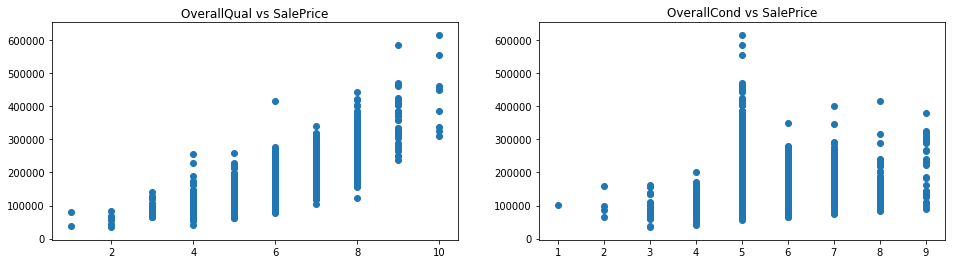

In [50]:
col1 = 'OverallQual'
col2 = 'OverallCond'
df = new_train_csv[[col1, col2, target]]

show_corr(col1, col2, target)
df.corr()

It's easy to see that there's high correlation between OverallQual and SalePrice. However there's no correlation between OverallCond and SalePrice.<br>

Let's try to interact these two features in order to improve correlation with the target variable:<br>
To my opinion, *condition* of an item could only **badly**-affect the price of a house (I would expect the item to be in good condition, so I wouldn't like to pay more for that. However, if the condition is bad, I would expect a discount). 

Therefore, I suggest the following interaction between these 2 features: OverallQual - 1/OverallCond

In [51]:
df['OverallQC'] = df.OverallQual - 1/df.OverallCond

,OverallQual,OverallCond,SalePrice,OverallQC
OverallQual,1.000000,-0.084570,0.797126,0.999477
OverallCond,-0.084570,1.000000,-0.089369,-0.056744
SalePrice,0.797126,-0.089369,1.000000,0.796338
OverallQC,0.999477,-0.056744,0.796338,1.000000


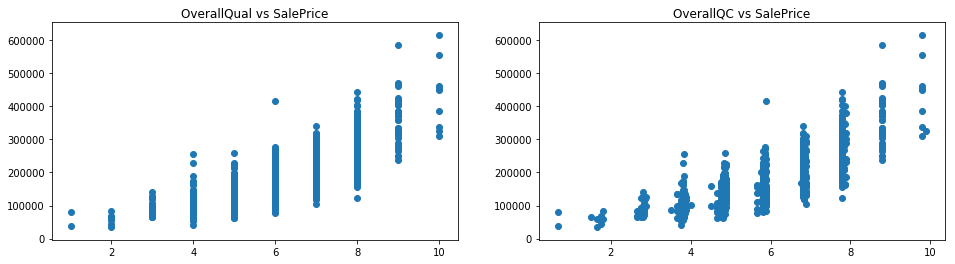

In [52]:
intrct_col = 'OverallQC'
show_corr(col1, intrct_col, target)
df.corr()

The correlation of the interaction feature is a bit lower than the original Qual feature. However, by looking at the plot above, it is noticeable that it is worth trying to group the lower values of the new feature.

In [53]:
def calc_OverallQC_group(qc):
    '''Returns 7 groups of OverallQC interaction'''
    if qc <= 4.2: 
        return 1
    if qc <= 5.2:
        return 2
    if qc <= 6.2:
        return 3
    if qc <= 7.2:
        return 4
    if qc <= 8.2:
        return 5
    if qc <= 9.2:
        return 6
    return 7

df['OverallQCGrp_ord'] = df['OverallQC'].apply(calc_OverallQC_group)

,OverallQual,OverallCond,SalePrice,OverallQC,OverallQCGrp_ord
OverallQual,1.000000,-0.084570,0.797126,0.999477,0.987786
OverallCond,-0.084570,1.000000,-0.089369,-0.056744,-0.113900
SalePrice,0.797126,-0.089369,1.000000,0.796338,0.804005
OverallQC,0.999477,-0.056744,0.796338,1.000000,0.986359
OverallQCGrp_ord,0.987786,-0.113900,0.804005,0.986359,1.000000


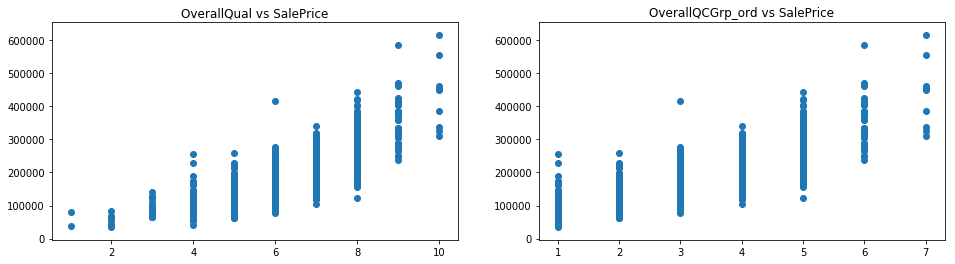

In [54]:
intrct_col = 'OverallQCGrp_ord'
show_corr(col1, intrct_col, target)
df.corr()

The correlation has slightly improved, and we can drop the 2 original features

##### 3.3.1.2. ExterQual and ExterCond

,ExterQual_ord,ExterCond_ord,SalePrice
ExterQual_ord,1.000000,0.036859,0.684316
ExterCond_ord,0.036859,1.000000,0.004393
SalePrice,0.684316,0.004393,1.000000


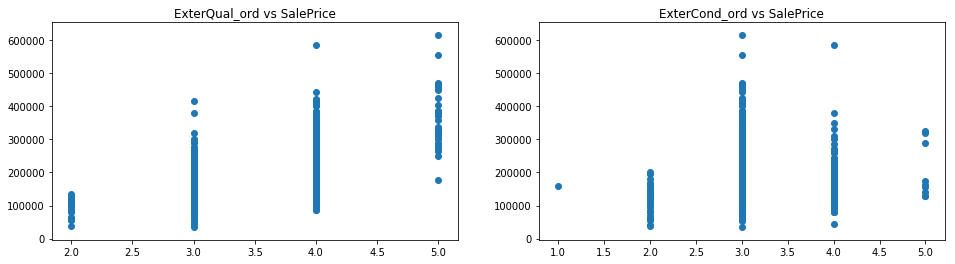

In [55]:
col1 = 'ExterQual_ord'
col2 = 'ExterCond_ord'
df = new_train_csv[[col1, col2, target]]

show_corr(col1, col2, target)
df.corr()

In [56]:
df['ExterQC'] = df.ExterQual_ord - 1/df.ExterCond_ord

,ExterQual_ord,ExterCond_ord,SalePrice,ExterQC
ExterQual_ord,1.000000,0.036859,0.684316,0.997078
ExterCond_ord,0.036859,1.000000,0.004393,0.106994
SalePrice,0.684316,0.004393,1.000000,0.681195
ExterQC,0.997078,0.106994,0.681195,1.000000


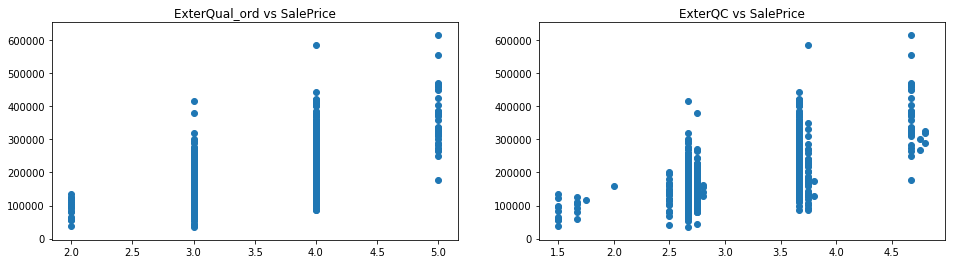

In [57]:
intrct_col = 'ExterQC'
show_corr(col1, intrct_col, target)
df.corr()

In [58]:
def calc_ExterQC_group(qc):
    '''Returns 3 groups of ExterQC interaction'''
    if qc <= 3: 
        return 1
    if qc <= 4:
        return 2
    return 3

df['ExterQCGrp_ord'] = df['ExterQC'].apply(calc_ExterQC_group)

,ExterQual_ord,ExterCond_ord,SalePrice,ExterQC,ExterQCGrp_ord
ExterQual_ord,1.000000,0.036859,0.684316,0.997078,0.982401
ExterCond_ord,0.036859,1.000000,0.004393,0.106994,0.005807
SalePrice,0.684316,0.004393,1.000000,0.681195,0.681470
ExterQC,0.997078,0.106994,0.681195,1.000000,0.976222
ExterQCGrp_ord,0.982401,0.005807,0.681470,0.976222,1.000000


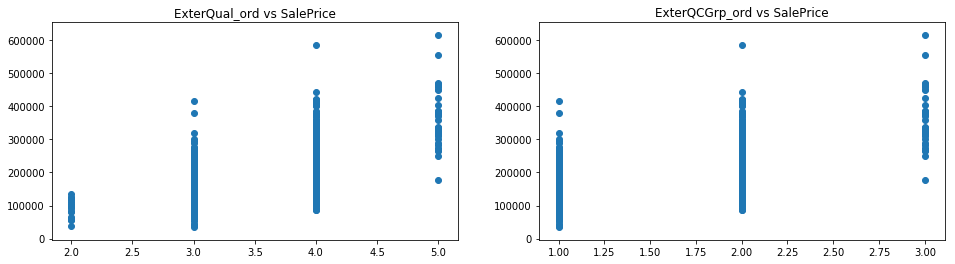

In [59]:
intrct_col = 'ExterQCGrp_ord'
show_corr(col1, intrct_col, target)
df.corr()

No improvement - leave original features.

##### 3.3.1.3. BsmtQual and BsmtCond

,BsmtQual_ord,BsmtCond_ord,SalePrice
BsmtQual_ord,1.000000,0.662088,0.590132
BsmtCond_ord,0.662088,1.000000,0.243597
SalePrice,0.590132,0.243597,1.000000


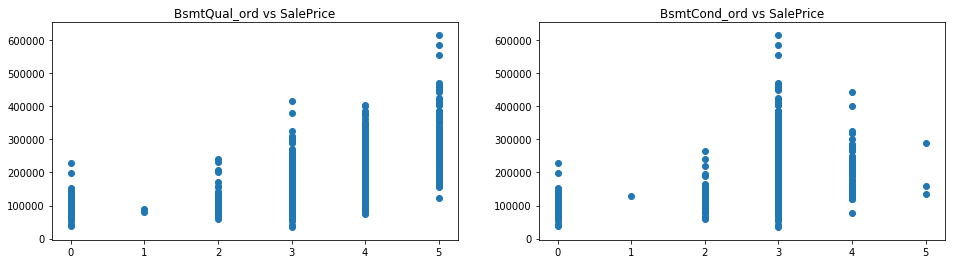

In [60]:
col1 = 'BsmtQual_ord'
col2 = 'BsmtCond_ord'
df = new_train_csv[[col1, col2, target]]

show_corr(col1, col2, target)
df.corr()

In [61]:
df['BsmtQC'] = df.BsmtQual_ord - 1/df.BsmtCond_ord

,BsmtQual_ord,BsmtCond_ord,SalePrice,BsmtQC
BsmtQual_ord,1.000000,0.662088,0.590132,0.998358
BsmtCond_ord,0.662088,1.000000,0.243597,0.231795
SalePrice,0.590132,0.243597,1.000000,0.644564
BsmtQC,0.998358,0.231795,0.644564,1.000000


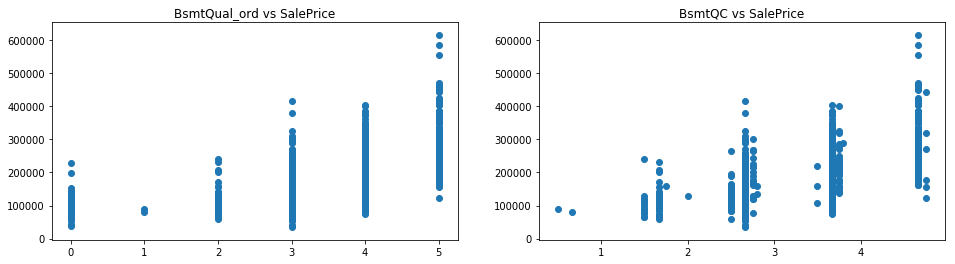

In [62]:
intrct_col = 'BsmtQC'
show_corr(col1, intrct_col, target)
df.corr()

In [63]:
def calc_BsmtQC_group(qc):
    '''Returns 3 groups of BsmtQC interaction'''
    if qc <= 3: 
        return 1
    if qc <= 4:
        return 2
    return 3

df['BsmtQCGrp_ord'] = df['BsmtQC'].apply(calc_BsmtQC_group)

,BsmtQual_ord,BsmtCond_ord,SalePrice,BsmtQC,BsmtQCGrp_ord
BsmtQual_ord,1.000000,0.662088,0.590132,0.998358,0.804459
BsmtCond_ord,0.662088,1.000000,0.243597,0.231795,0.208273
SalePrice,0.590132,0.243597,1.000000,0.644564,0.661255
BsmtQC,0.998358,0.231795,0.644564,1.000000,0.959595
BsmtQCGrp_ord,0.804459,0.208273,0.661255,0.959595,1.000000


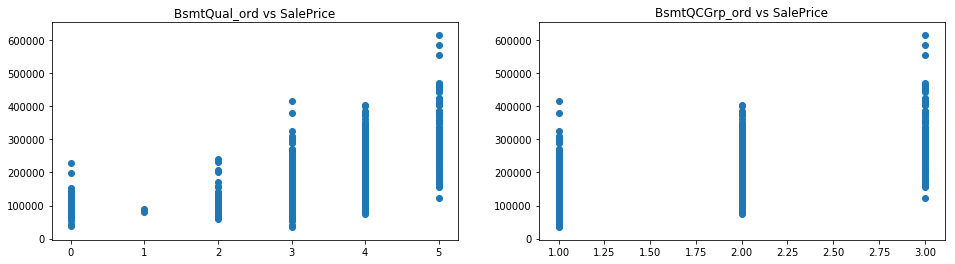

In [64]:
intrct_col = 'BsmtQCGrp_ord'
show_corr(col1, intrct_col, target)
df.corr()

The correlation has improved, and we can drop the 2 original features

##### 3.3.1.4. GarageQual and GarageCond

,GarageQual_ord,GarageCond_ord,SalePrice
GarageQual_ord,1.000000,0.939111,0.278813
GarageCond_ord,0.939111,1.000000,0.269406
SalePrice,0.278813,0.269406,1.000000


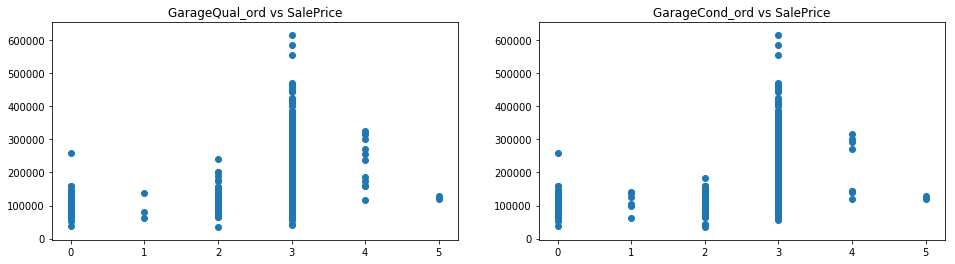

In [65]:
col1 = 'GarageQual_ord'
col2 = 'GarageCond_ord'
df = new_train_csv[[col1, col2, target]]

show_corr(col1, col2, target)
df.corr()

Neither GarageQual_ord nor GarageCond_ord correlates with SalePrice.

##### 3.3.1.5. Quality and Condition - Conclusion

To conclude this section:<br>
a. I'll add the features OverallQCGrp_ord and BsmtQCGrp_ord <br>
b. I'll drop the following features: OverallQual, OverallCond, BsmtQual_ord, BsmtCond_ord

#### 3.3.2. Continuous features - "areas"

There are a lot of continuous features that relate to areas:
- LotArea, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, PoolArea, LowQualFinSF
- BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
- OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch

I'll now explore these features and the connections among them and how they correlate with the target variable.

##### 3.3.2.1. Porches

In [66]:
porch_columns = ['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', target]
df = new_train_csv[porch_columns]
df.corr()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
OpenPorchSF,1.000000,-0.056804,-0.008815,0.012183,0.342761
EnclosedPorch,-0.056804,1.000000,-0.030379,-0.073549,-0.107458
3SsnPorch,-0.008815,-0.030379,1.000000,-0.024372,0.006165
ScreenPorch,0.012183,-0.073549,-0.024372,1.000000,0.101079
SalePrice,0.342761,-0.107458,0.006165,0.101079,1.000000


None of the above correlates to each other or to the SalePrice. Will their *sum* correlation with the target variable be higher?

In [67]:
df.head(10)

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
0,60,0,0,0,145000
1,40,0,0,0,133000
2,40,0,0,0,130000
3,40,0,0,0,192140
4,111,0,0,0,345000
5,35,0,0,0,178000
6,39,0,0,0,237000
7,0,0,0,0,130000
8,0,112,0,0,112000
9,8,128,0,0,79000


In [68]:
df['AllPorches'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df.corr()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,AllPorches
OpenPorchSF,1.000000,-0.056804,-0.008815,0.012183,0.342761,0.559743
EnclosedPorch,-0.056804,1.000000,-0.030379,-0.073549,-0.107458,0.577111
3SsnPorch,-0.008815,-0.030379,1.000000,-0.024372,0.006165,0.179001
ScreenPorch,0.012183,-0.073549,-0.024372,1.000000,0.101079,0.478331
SalePrice,0.342761,-0.107458,0.006165,0.101079,1.000000,0.186975
AllPorches,0.559743,0.577111,0.179001,0.478331,0.186975,1.000000


No improvement.<br>
I will leave these features as-is, for now.

##### 3.3.2.2. Basements

In [69]:
bsmt_columns = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', target]
df = new_train_csv[bsmt_columns]
df.corr()

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
BsmtFinSF1,1.000000,-0.045795,-0.485700,0.491831,0.449350
BsmtFinSF2,-0.045795,1.000000,-0.238715,0.143400,0.056634
BsmtUnfSF,-0.485700,-0.238715,1.000000,0.430700,0.163958
TotalBsmtSF,0.491831,0.143400,0.430700,1.000000,0.646141
SalePrice,0.449350,0.056634,0.163958,0.646141,1.000000


The TotalBsmt feature is the only one which somehow correlates to the SalePrice. If this feature is actually the sum of all the rest, I'll drop the rest.

In [70]:
df.head(10)

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,SalePrice
0,0.0,0.0,1332.0,1332.0,145000
1,584.0,139.0,0.0,723.0,133000
2,0.0,0.0,970.0,970.0,130000
3,0.0,0.0,732.0,732.0,192140
4,1410.0,0.0,542.0,1952.0,345000
5,0.0,0.0,707.0,707.0,178000
6,483.0,0.0,458.0,941.0,237000
7,535.0,159.0,88.0,782.0,130000
8,0.0,0.0,816.0,816.0,112000
9,0.0,0.0,572.0,572.0,79000


In [71]:
(df['TotalBsmtSF'] == df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['BsmtUnfSF']).all()

True

##### 3.3.2.3. Living area

In [72]:
living_columns = ['LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'PoolArea', 'LowQualFinSF', target]
df = new_train_csv[living_columns]
df.corr()

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,PoolArea,LowQualFinSF,SalePrice
LotArea,1.000000,0.299962,0.020977,0.241585,0.192410,0.182810,0.079873,-0.022064,0.252601
1stFlrSF,0.299962,1.000000,-0.269810,0.506216,0.470192,0.229662,0.072068,-0.030590,0.635734
2ndFlrSF,0.020977,-0.269810,1.000000,0.688527,0.162758,0.094908,-0.000027,-0.020414,0.284672
GrLivArea,0.241585,0.506216,0.688527,1.000000,0.493243,0.254138,0.053471,0.056327,0.724759
GarageArea,0.192410,0.470192,0.162758,0.493243,1.000000,0.251184,0.044156,-0.049043,0.646060
WoodDeckSF,0.182810,0.229662,0.094908,0.254138,0.251184,1.000000,0.049585,-0.029515,0.351126
PoolArea,0.079873,0.072068,-0.000027,0.053471,0.044156,0.049585,1.000000,-0.005785,0.038059
LowQualFinSF,-0.022064,-0.030590,-0.020414,0.056327,-0.049043,-0.029515,-0.005785,1.000000,-0.064597
SalePrice,0.252601,0.635734,0.284672,0.724759,0.646060,0.351126,0.038059,-0.064597,1.000000


In [73]:
df.head(10)

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,PoolArea,LowQualFinSF,SalePrice
0,7175,1332,0,1332,542.0,0,0,0,145000
1,4058,767,0,767,367.0,120,0,0,133000
2,2522,970,739,1709,380.0,0,0,0,130000
3,21930,734,1104,1838,372.0,100,0,0,192140
4,13860,2000,704,2704,538.0,269,0,0,345000
5,9056,707,707,1414,403.0,100,0,0,178000
6,9548,941,888,1829,613.0,192,0,0,237000
7,10820,810,0,810,576.0,0,0,0,130000
8,25339,1416,0,1416,576.0,0,0,0,112000
9,9600,572,524,1096,0.0,0,0,0,79000


It seems that GrLivArea is the sum of 1stFlrSF and 2ndFlrSF. However...

In [74]:
(df['GrLivArea'] == df['1stFlrSF'] + df['2ndFlrSF']).all()

False

In [75]:
(df['GrLivArea'] == df['1stFlrSF'] + df['2ndFlrSF']).sum()

1595

In [76]:
df[df['GrLivArea'] != df['1stFlrSF'] + df['2ndFlrSF']]

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,PoolArea,LowQualFinSF,SalePrice
140,6000,1008,0,1522,0.0,0,0,514,102000
145,5250,938,1215,2358,0.0,0,0,205,122000
361,2544,520,623,1223,480.0,0,0,80,147400
438,6240,848,0,1208,539.0,0,0,360,103000
454,5500,926,0,1316,484.0,0,0,390,130000
475,8400,1052,720,2192,240.0,262,0,420,179500
481,6240,816,0,1176,528.0,112,0,360,114500
586,3180,520,600,1200,480.0,0,0,80,151000
614,15400,904,611,1774,384.0,290,0,259,165000
844,6780,520,0,754,0.0,53,0,234,84500


In [77]:
(df['GrLivArea'] == df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']).all()

True

In fact, GrLivArea is the sum of 1stFlrSF, 2ndFlrSF and LowQualFinSF.<br>
Since among the above, GrLivArea has the highest correlation to SalePrice, I'm considering dropping the rest.<br>
However, before doing so, I'd like to check the corrleation of '1stFlrSF' + '2ndFlrSF' to the SalePrice.

In [78]:
df['FrstScndFlrSF'] = df['1stFlrSF'] + df['2ndFlrSF']
df.corr()

,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,PoolArea,LowQualFinSF,SalePrice,FrstScndFlrSF
LotArea,1.000000,0.299962,0.020977,0.241585,0.192410,0.182810,0.079873,-0.022064,0.252601,0.243916
1stFlrSF,0.299962,1.000000,-0.269810,0.506216,0.470192,0.229662,0.072068,-0.030590,0.635734,0.509575
2ndFlrSF,0.020977,-0.269810,1.000000,0.688527,0.162758,0.094908,-0.000027,-0.020414,0.284672,0.691028
GrLivArea,0.241585,0.506216,0.688527,1.000000,0.493243,0.254138,0.053471,0.056327,0.724759,0.995244
GarageArea,0.192410,0.470192,0.162758,0.493243,1.000000,0.251184,0.044156,-0.049043,0.646060,0.498393
WoodDeckSF,0.182810,0.229662,0.094908,0.254138,0.251184,1.000000,0.049585,-0.029515,0.351126,0.257206
PoolArea,0.079873,0.072068,-0.000027,0.053471,0.044156,0.049585,1.000000,-0.005785,0.038059,0.054075
LowQualFinSF,-0.022064,-0.030590,-0.020414,0.056327,-0.049043,-0.029515,-0.005785,1.000000,-0.064597,-0.041204
SalePrice,0.252601,0.635734,0.284672,0.724759,0.646060,0.351126,0.038059,-0.064597,1.000000,0.731598
FrstScndFlrSF,0.243916,0.509575,0.691028,0.995244,0.498393,0.257206,0.054075,-0.041204,0.731598,1.000000


It seems that the new feature correlates slightly better to the target variable, than the original GrLivArea feature. Therefore, I'll keep this new feature and drop: 1stFlrSF, 2ndFlrSF, LowQualFinSF and GrLivArea.

##### 3.3.2.4. All areas together

In [79]:
areas_columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','TotalBsmtSF',
                 '1stFlrSF','2ndFlrSF','GarageArea','WoodDeckSF','PoolArea',target]

In [80]:
df = new_train_csv[areas_columns]
df.corr()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,PoolArea,SalePrice
OpenPorchSF,1.000000,-0.056804,-0.008815,0.012183,0.198884,0.171810,0.200058,0.246168,0.051787,0.058370,0.342761
EnclosedPorch,-0.056804,1.000000,-0.030379,-0.073549,-0.070078,-0.066056,0.064593,-0.086173,-0.104376,0.120068,-0.107458
3SsnPorch,-0.008815,-0.030379,1.000000,-0.024372,0.009581,0.015842,-0.018821,0.009776,-0.020723,-0.005452,0.006165
ScreenPorch,0.012183,-0.073549,-0.024372,1.000000,0.086312,0.096175,0.005118,0.030378,-0.062930,0.077637,0.101079
TotalBsmtSF,0.198884,-0.070078,0.009581,0.086312,1.000000,0.774394,-0.208061,0.450304,0.218633,-0.011755,0.646141
1stFlrSF,0.171810,-0.066056,0.015842,0.096175,0.774394,1.000000,-0.269810,0.470192,0.229662,0.072068,0.635734
2ndFlrSF,0.200058,0.064593,-0.018821,0.005118,-0.208061,-0.269810,1.000000,0.162758,0.094908,-0.000027,0.284672
GarageArea,0.246168,-0.086173,0.009776,0.030378,0.450304,0.470192,0.162758,1.000000,0.251184,0.044156,0.646060
WoodDeckSF,0.051787,-0.104376,-0.020723,-0.062930,0.218633,0.229662,0.094908,0.251184,1.000000,0.049585,0.351126
PoolArea,0.058370,0.120068,-0.005452,0.077637,-0.011755,0.072068,-0.000027,0.044156,0.049585,1.000000,0.038059


How about summing all the above...

In [81]:
df['AllAreasSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch'] + df['TotalBsmtSF'] + \
                 df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea'] + df['WoodDeckSF'] + df['PoolArea']
df.corr()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,PoolArea,SalePrice,AllAreasSF
OpenPorchSF,1.000000,-0.056804,-0.008815,0.012183,0.198884,0.171810,0.200058,0.246168,0.051787,0.058370,0.342761,0.363520
EnclosedPorch,-0.056804,1.000000,-0.030379,-0.073549,-0.070078,-0.066056,0.064593,-0.086173,-0.104376,0.120068,-0.107458,0.007666
3SsnPorch,-0.008815,-0.030379,1.000000,-0.024372,0.009581,0.015842,-0.018821,0.009776,-0.020723,-0.005452,0.006165,0.020344
ScreenPorch,0.012183,-0.073549,-0.024372,1.000000,0.086312,0.096175,0.005118,0.030378,-0.062930,0.077637,0.101079,0.128664
TotalBsmtSF,0.198884,-0.070078,0.009581,0.086312,1.000000,0.774394,-0.208061,0.450304,0.218633,-0.011755,0.646141,0.772734
1stFlrSF,0.171810,-0.066056,0.015842,0.096175,0.774394,1.000000,-0.269810,0.470192,0.229662,0.072068,0.635734,0.739301
2ndFlrSF,0.200058,0.064593,-0.018821,0.005118,-0.208061,-0.269810,1.000000,0.162758,0.094908,-0.000027,0.284672,0.319880
GarageArea,0.246168,-0.086173,0.009776,0.030378,0.450304,0.470192,0.162758,1.000000,0.251184,0.044156,0.646060,0.708169
WoodDeckSF,0.051787,-0.104376,-0.020723,-0.062930,0.218633,0.229662,0.094908,0.251184,1.000000,0.049585,0.351126,0.408597
PoolArea,0.058370,0.120068,-0.005452,0.077637,-0.011755,0.072068,-0.000027,0.044156,0.049585,1.000000,0.038059,0.088277


Wow! nice correlation with the target variable!<br>
But what if we try to sum only the "most significant" area features?

In [82]:
df['AllAreasSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea'] + df['WoodDeckSF']
df.corr()

,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,PoolArea,SalePrice,AllAreasSF
OpenPorchSF,1.000000,-0.056804,-0.008815,0.012183,0.198884,0.171810,0.200058,0.246168,0.051787,0.058370,0.342761,0.309150
EnclosedPorch,-0.056804,1.000000,-0.030379,-0.073549,-0.070078,-0.066056,0.064593,-0.086173,-0.104376,0.120068,-0.107458,-0.061100
3SsnPorch,-0.008815,-0.030379,1.000000,-0.024372,0.009581,0.015842,-0.018821,0.009776,-0.020723,-0.005452,0.006165,0.001002
ScreenPorch,0.012183,-0.073549,-0.024372,1.000000,0.086312,0.096175,0.005118,0.030378,-0.062930,0.077637,0.101079,0.075968
TotalBsmtSF,0.198884,-0.070078,0.009581,0.086312,1.000000,0.774394,-0.208061,0.450304,0.218633,-0.011755,0.646141,0.782156
1stFlrSF,0.171810,-0.066056,0.015842,0.096175,0.774394,1.000000,-0.269810,0.470192,0.229662,0.072068,0.635734,0.745646
2ndFlrSF,0.200058,0.064593,-0.018821,0.005118,-0.208061,-0.269810,1.000000,0.162758,0.094908,-0.000027,0.284672,0.311234
GarageArea,0.246168,-0.086173,0.009776,0.030378,0.450304,0.470192,0.162758,1.000000,0.251184,0.044156,0.646060,0.715128
WoodDeckSF,0.051787,-0.104376,-0.020723,-0.062930,0.218633,0.229662,0.094908,0.251184,1.000000,0.049585,0.351126,0.427211
PoolArea,0.058370,0.120068,-0.005452,0.077637,-0.011755,0.072068,-0.000027,0.044156,0.049585,1.000000,0.038059,0.039310


Even better!<br>

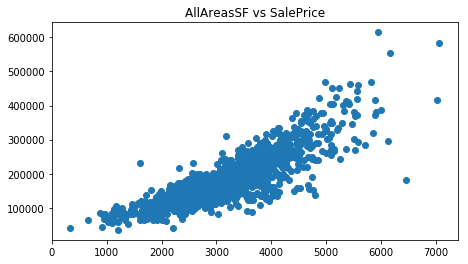

In [83]:
col1 = 'AllAreasSF'
show_corr(col1, col1, target)

##### 3.3.2.5. Continuous features - "areas" - Conclusion

So, to conclude this section:<br>
a. I'll add the above 'AllAreasSF' feature<br>
b. I'll drop the following features: <br>
OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea, WoodDeckSF, PoolArea, LowQualFinSF.


#### 3.3.3. GarageCars and GarageArea

Since GarageCars and GarageArea actually relate to the same thing - size of garage, I assume the correlation between them is high. I'll also show the correlation of these 2 features to the target variable.

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.892355,0.659396
GarageArea,0.892355,1.000000,0.646060
SalePrice,0.659396,0.646060,1.000000


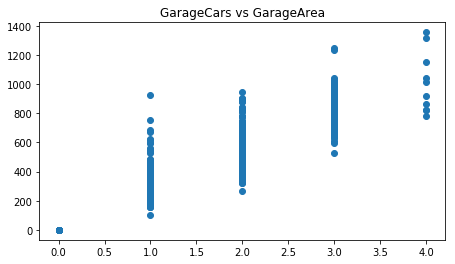

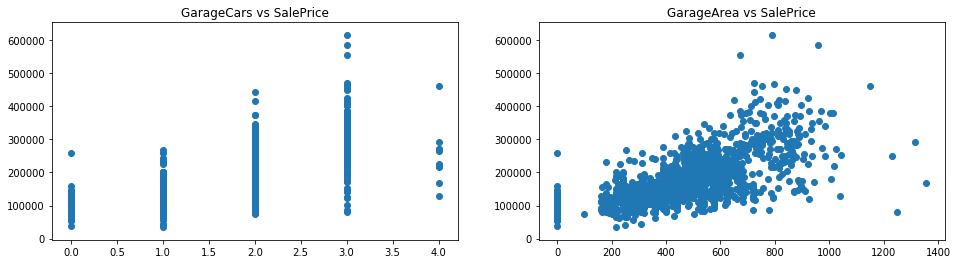

In [84]:
col1 = 'GarageCars'
col2 = 'GarageArea'
df = new_train_csv[[col1, col2, target]]

show_corr(col1, col1, col2)
show_corr(col1, col2, target)
df.corr()

As suspected - there's a high correlation between the 2 features. Since GarageCars' correlation with SalePrice is a bit higher, I'll drop the GarageArea feature.

#### 3.3.4 Discrete features - Rooms

The following Discrete features somehow relate to rooms: BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd 


In [85]:
rooms_columns = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd',target]
df = new_train_csv[rooms_columns]
df.corr()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice
BsmtFullBath,1.000000,-0.192271,-0.037197,-0.051920,-0.140822,-0.068540,-0.061917,0.290153
BsmtHalfBath,-0.192271,1.000000,-0.040306,-0.080769,0.007425,-0.041415,-0.062157,-0.046301
FullBath,-0.037197,-0.040306,1.000000,0.185003,0.375830,0.194121,0.541637,0.548129
HalfBath,-0.051920,-0.080769,0.185003,1.000000,0.248271,-0.058362,0.327010,0.289308
BedroomAbvGr,-0.140822,0.007425,0.375830,0.248271,1.000000,0.217750,0.695304,0.178772
KitchenAbvGr,-0.068540,-0.041415,0.194121,-0.058362,0.217750,1.000000,0.304929,-0.118232
TotRmsAbvGrd,-0.061917,-0.062157,0.541637,0.327010,0.695304,0.304929,1.000000,0.480798
SalePrice,0.290153,-0.046301,0.548129,0.289308,0.178772,-0.118232,0.480798,1.000000


It seems that none of the above significantly correlates to the SalePrice.

In [86]:
df.head(10)

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice
0,0.0,0.0,2,0,2,1,5,145000
1,1.0,0.0,1,0,1,1,4,133000
2,0.0,0.0,2,0,3,1,7,130000
3,0.0,0.0,2,1,4,1,7,192140
4,1.0,0.0,2,1,4,1,9,345000
5,0.0,0.0,2,1,3,1,6,178000
6,1.0,0.0,2,1,3,1,7,237000
7,1.0,0.0,1,0,2,1,4,130000
8,0.0,0.0,2,0,3,1,7,112000
9,0.0,0.0,1,0,2,1,5,79000


It is not clear what's included in TotRmsAbvGrd (the data_description text file says that it doesn't include bathrooms).

In [87]:
(df.TotRmsAbvGrd == df.BedroomAbvGr + df.KitchenAbvGr).sum()

11

In [88]:
(df.TotRmsAbvGrd == df.FullBath + df.HalfBath + df.BedroomAbvGr + df.KitchenAbvGr).sum()

657

In [89]:
(df.TotRmsAbvGrd == df.BsmtFullBath + df.FullBath + df.BedroomAbvGr + df.KitchenAbvGr).sum()

619

In [90]:
(df.TotRmsAbvGrd == df.BsmtFullBath + df.FullBath + df.BedroomAbvGr).sum()

226

In [91]:
(df.TotRmsAbvGrd == df.BsmtFullBath + df.BsmtHalfBath + df.FullBath + df.HalfBath + df.BedroomAbvGr).sum()

383

In [92]:
(df.TotRmsAbvGrd == df.BsmtFullBath + df.BsmtHalfBath + df.FullBath + df.HalfBath + df.BedroomAbvGr + df.KitchenAbvGr).sum()

669

Let's try some combinations:

In [93]:
df['AllRooms'] = df.BsmtFullBath + df.BsmtHalfBath + df.FullBath + df.HalfBath + df.BedroomAbvGr + df.KitchenAbvGr
df['HalfBaths'] = df.BsmtHalfBath + df.HalfBath
df['FullBaths'] = df.BsmtFullBath + df.FullBath
df['BathsAbvGrd'] = df.FullBath + df.HalfBath
df['BathsBsmt'] = df.BsmtFullBath + df.BsmtHalfBath
df['BdrmKchn'] =  df.BedroomAbvGr + df.KitchenAbvGr
df['BdrmBath'] = df.FullBath + df.BsmtFullBath + df.BedroomAbvGr
df.corr()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,SalePrice,AllRooms,HalfBaths,FullBaths,BathsAbvGrd,BathsBsmt,BdrmKchn,BdrmBath
BsmtFullBath,1.000000,-0.192271,-0.037197,-0.051920,-0.140822,-0.068540,-0.061917,0.290153,0.203068,-0.137376,0.673083,-0.057428,0.884525,-0.145949,0.318150
BsmtHalfBath,-0.192271,1.000000,-0.040306,-0.080769,0.007425,-0.041415,-0.062157,-0.046301,0.060775,0.390481,-0.164537,-0.077439,0.287720,-0.002736,-0.096265
FullBath,-0.037197,-0.040306,1.000000,0.185003,0.375830,0.194121,0.541637,0.548129,0.664474,0.152128,0.714019,0.792497,-0.055461,0.392109,0.697235
HalfBath,-0.051920,-0.080769,0.185003,1.000000,0.248271,-0.058362,0.327010,0.289308,0.517419,0.886064,0.100541,0.745963,-0.089064,0.215798,0.231979
BedroomAbvGr,-0.140822,0.007425,0.375830,0.248271,1.000000,0.217750,0.695304,0.178772,0.779818,0.232764,0.179483,0.408769,-0.133902,0.974104,0.795485
KitchenAbvGr,-0.068540,-0.041415,0.194121,-0.058362,0.217750,1.000000,0.304929,-0.118232,0.288264,-0.073166,0.095645,0.095334,-0.086577,0.432785,0.208058
TotRmsAbvGrd,-0.061917,-0.062157,0.541637,0.327010,0.695304,0.304929,1.000000,0.480798,0.725090,0.273128,0.357474,0.569998,-0.089973,0.712864,0.696429
SalePrice,0.290153,-0.046301,0.548129,0.289308,0.178772,-0.118232,0.480798,1.000000,0.489018,0.245679,0.608944,0.551001,0.261158,0.137735,0.497540
AllRooms,0.203068,0.060775,0.664474,0.517419,0.779818,0.288264,0.725090,0.489018,1.000000,0.506168,0.634036,0.771409,0.227069,0.787066,0.924670
HalfBaths,-0.137376,0.390481,0.152128,0.886064,0.232764,-0.073166,0.273128,0.245679,0.506168,1.000000,0.016340,0.652977,0.051551,0.198045,0.169491


No combination gives a significant correlation with the target variable.

#### 3.3.5 Years features

The following features represent YEARS: YearBuilt, YearRemodAdd, GarageYrBlt, YrSold. <br>

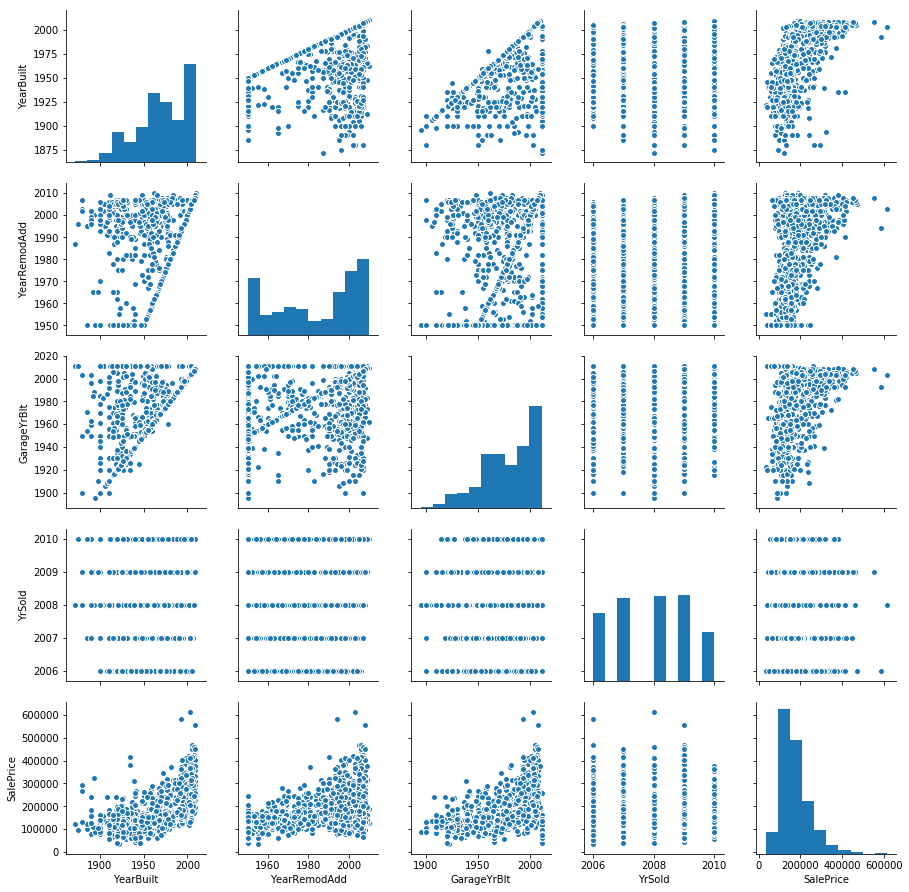

In [94]:
years_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', target]
ax = sns.pairplot(new_train_csv[years_columns])

In [95]:
df = new_train_csv[years_columns]
df.corr()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,SalePrice
YearBuilt,1.000000,0.556639,0.707711,0.017481,0.557070
YearRemodAdd,0.556639,1.000000,0.526725,0.082548,0.527414
GarageYrBlt,0.707711,0.526725,1.000000,0.023699,0.431531
YrSold,0.017481,0.082548,0.023699,1.000000,0.029422
SalePrice,0.557070,0.527414,0.431531,0.029422,1.000000


No significant insights.

Further investigation of the GarageYrBlt feature (was earlier imputed with 2011)

,GarageYrBlt,SalePrice
GarageYrBlt,1.000000,0.536827
SalePrice,0.536827,1.000000


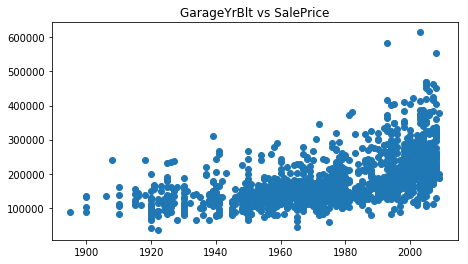

In [96]:
col1 = 'GarageYrBlt'
df = new_train_csv[[col1, target]]
df = df[df['GarageYrBlt'] < 2011]
show_corr(col1, col1, target)
df.corr()

Since there's no significant correlation between GarageYrBlt and SalePrice, and since this feature has a significant amount of missing values, I choose to drop this feature.

#### 3.3.6 Year and Month of selling

,YrSold,MoSold,SalePrice
YrSold,1.000000,-0.140679,0.029422
MoSold,-0.140679,1.000000,0.011916
SalePrice,0.029422,0.011916,1.000000


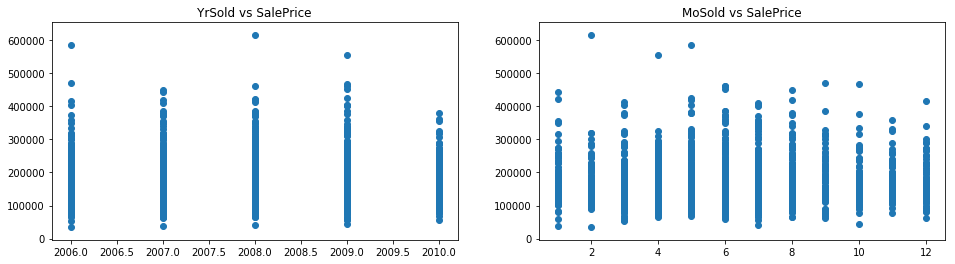

In [97]:
col1 = 'YrSold'
col2 = 'MoSold'
df = new_train_csv[[col1, col2, target]]

show_corr(col1, col2, target)
df.corr()

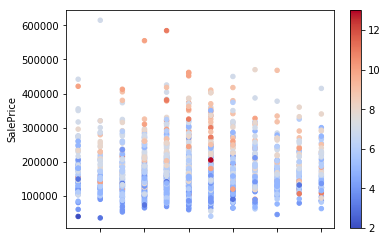

In [98]:
ax = new_train_csv.plot.scatter(x=col2, y=target, c=new_train_csv.TotRmsAbvGrd, cmap='coolwarm', s=20)

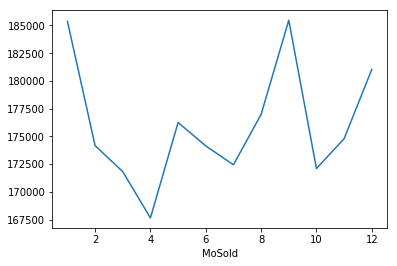

In [99]:
ax = new_train_csv.groupby('MoSold')['SalePrice'].mean().plot(legend=None)

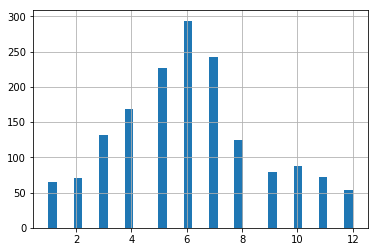

In [100]:
ax = new_train_csv.MoSold.hist(bins=36)  

It seems that most houses are sold from May to July. However the SalePrices are pretty low.<br>
On the other hand, it seems that in January, September and December only few houses are sold, but the SalePrices are high.

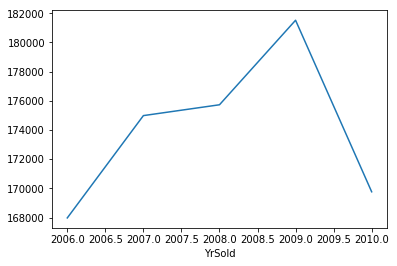

In [101]:
ax = new_train_csv.groupby('YrSold')['SalePrice'].mean().plot(legend=None)

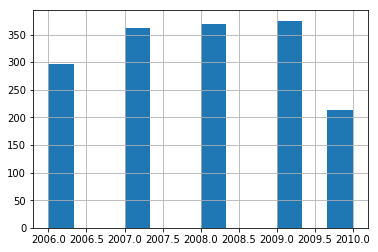

In [102]:
ax = new_train_csv.YrSold.hist(bins=12)  

It seems that it's ok to drop these two features.

#### 3.3.7. Categorical Features 

I'll use the df I defined earlier.

In [103]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 23 columns):
MSSubClass      1616 non-null int64
MSZoning        1616 non-null int64
Street          1616 non-null int64
Alley           1616 non-null int64
LandContour     1616 non-null int64
LotConfig       1616 non-null int64
Neighborhood    1616 non-null int64
Condition1      1616 non-null int64
Condition2      1616 non-null int64
BldgType        1616 non-null int64
HouseStyle      1616 non-null int64
RoofStyle       1616 non-null int64
RoofMatl        1616 non-null int64
Exterior1st     1616 non-null int64
Exterior2nd     1616 non-null int64
MasVnrType      1616 non-null int64
Foundation      1616 non-null int64
Heating         1616 non-null int64
CentralAir      1616 non-null int64
GarageType      1616 non-null int64
MiscFeature     1616 non-null int64
SaleType        1616 non-null int64
SalePrice       1616 non-null int64
dtypes: int64(23)
memory usage: 290.5 KB


##### 3.3.7.1. Categorical Features that relate to the surroundings

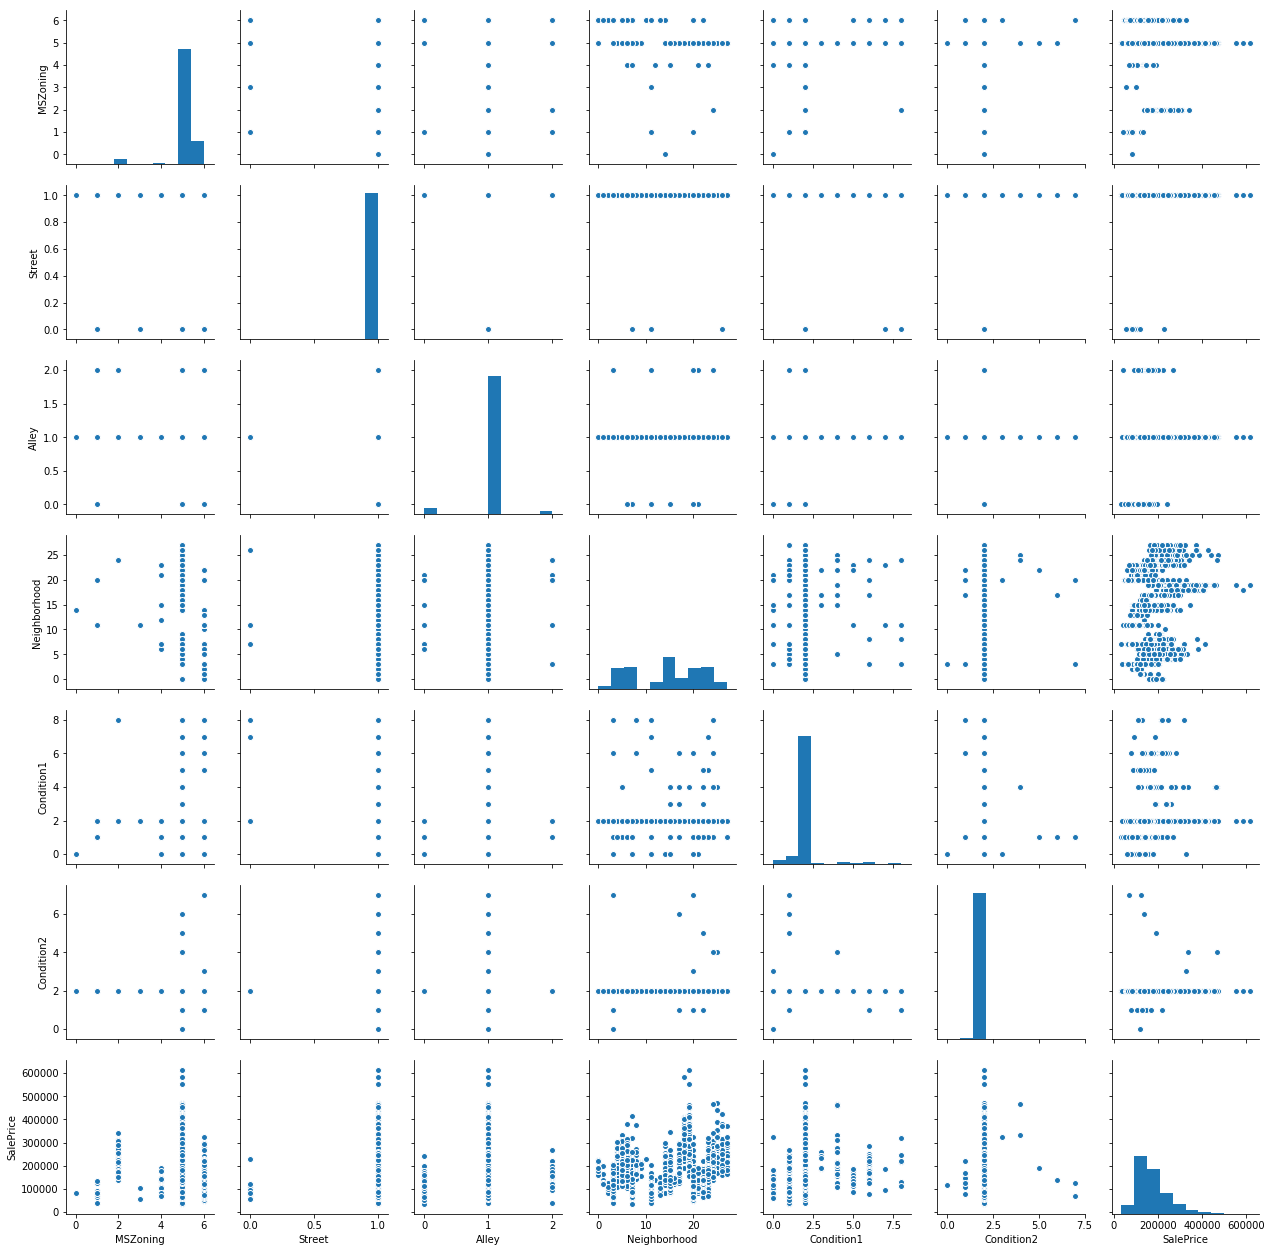

In [104]:
surroundings_columns = ['MSZoning','Street','Alley','Neighborhood','Condition1','Condition2',target]
ax = sns.pairplot(df_categorical[surroundings_columns])

It seems that the only significant feature is the Neighborhood. Maybe the MSZoning too.

Is there a typical "price per SF" per neighborhood?

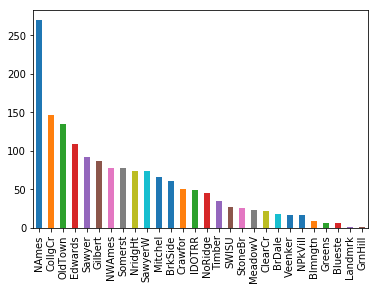

In [105]:
# Number of sales per Neighborhood
new_train_csv.Neighborhood.value_counts().plot(kind='bar')

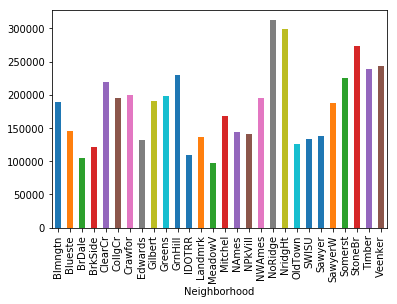

In [106]:
# mean sale price per Neighborhood
new_train_csv.groupby('Neighborhood')['SalePrice'].mean().plot(kind='bar')

In [107]:
columns = ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', target]
df = pd.concat([new_train_csv[columns], df_categorical['Neighborhood']], axis=1)
df['PricePerSF'] = df['SalePrice']/(df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GarageArea'] + df['WoodDeckSF'])
df.corr()

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,SalePrice,Neighborhood,PricePerSF
TotalBsmtSF,1.000000,0.774394,-0.208061,0.450304,0.218633,0.646141,0.195411,0.008637
1stFlrSF,0.774394,1.000000,-0.269810,0.470192,0.229662,0.635734,0.193329,0.082581
2ndFlrSF,-0.208061,-0.269810,1.000000,0.162758,0.094908,0.284672,-0.010321,0.078538
GarageArea,0.450304,0.470192,0.162758,1.000000,0.251184,0.646060,0.181091,0.143191
WoodDeckSF,0.218633,0.229662,0.094908,0.251184,1.000000,0.351126,0.038568,0.027737
SalePrice,0.646141,0.635734,0.284672,0.646060,0.351126,1.000000,0.188439,0.567005
Neighborhood,0.195411,0.193329,-0.010321,0.181091,0.038568,0.188439,1.000000,0.028907
PricePerSF,0.008637,0.082581,0.078538,0.143191,0.027737,0.567005,0.028907,1.000000


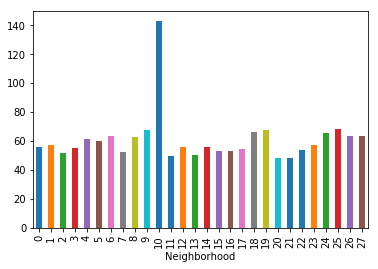

In [108]:
# mean SalePrice-per-SF per Neighborhood
df.groupby('Neighborhood')['PricePerSF'].mean().plot(kind='bar')

In [109]:
df[df['Neighborhood'] == 10]

,TotalBsmtSF,1stFlrSF,2ndFlrSF,GarageArea,WoodDeckSF,SalePrice,Neighborhood,PricePerSF
916,0.0,1295,0,312.0,0,230000,10,143.123833


It seems that the price-per-SF is almost the same in all neighborhoods (**one** exception in Neighborhood number 10)

##### 3.3.7.2. Categorical Features that relate to the property itself

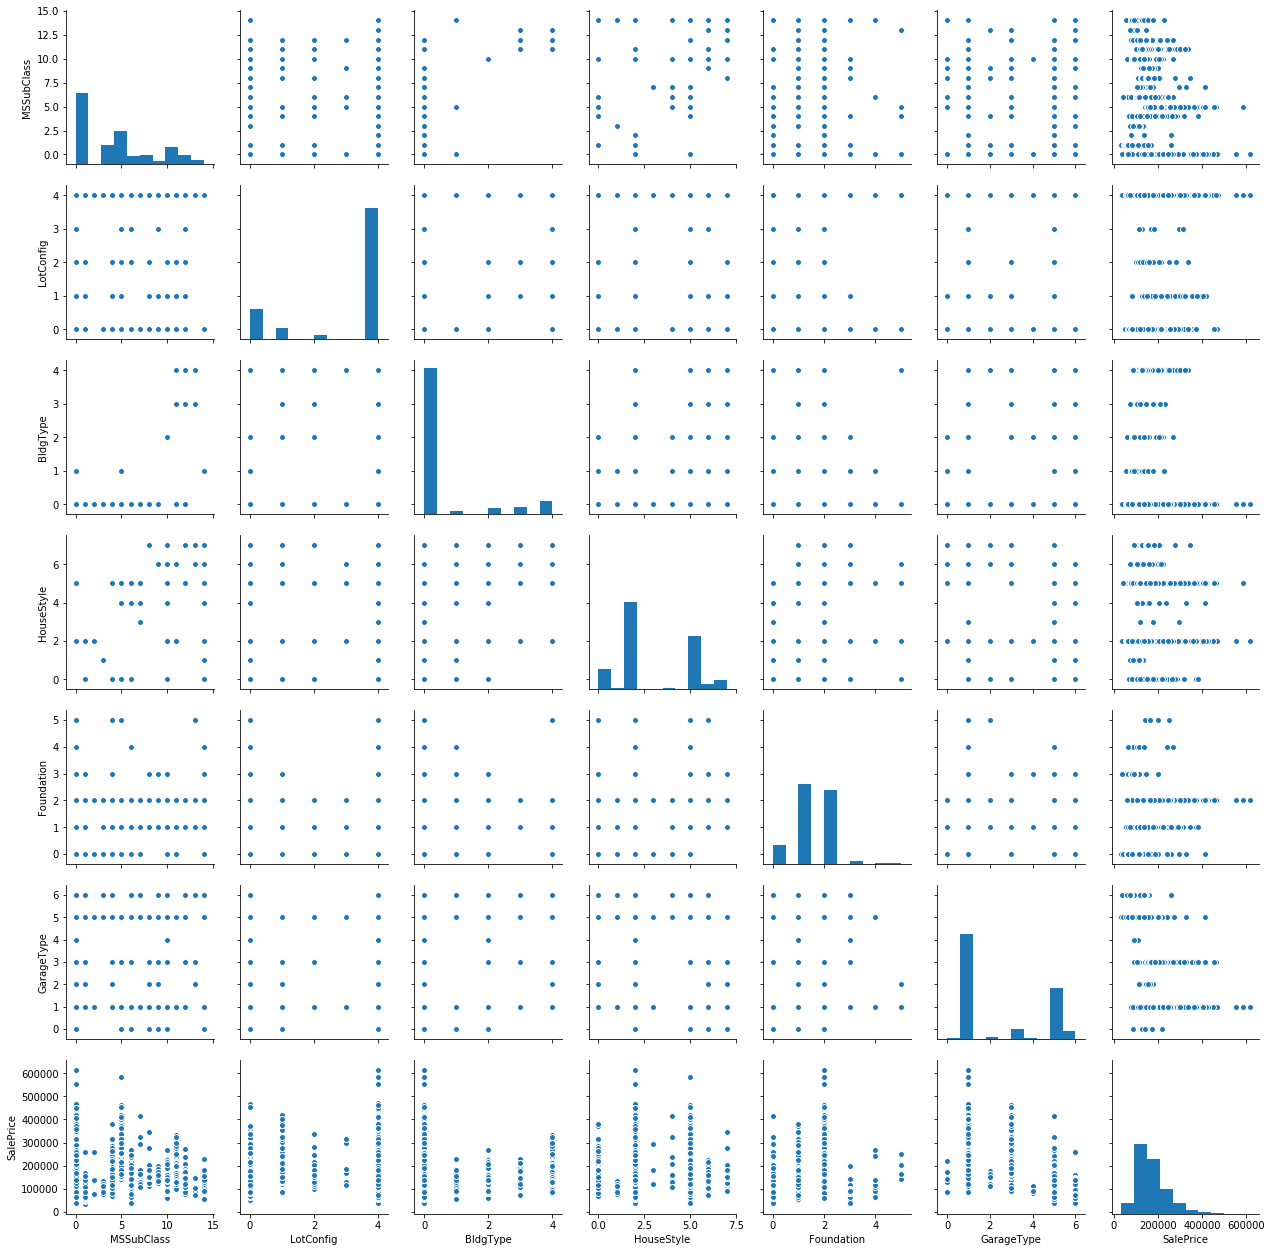

In [110]:
property_columns = ['MSSubClass','LotConfig','BldgType','HouseStyle','Foundation','GarageType',target]
ax = sns.pairplot(df_categorical[property_columns])

No specific insights

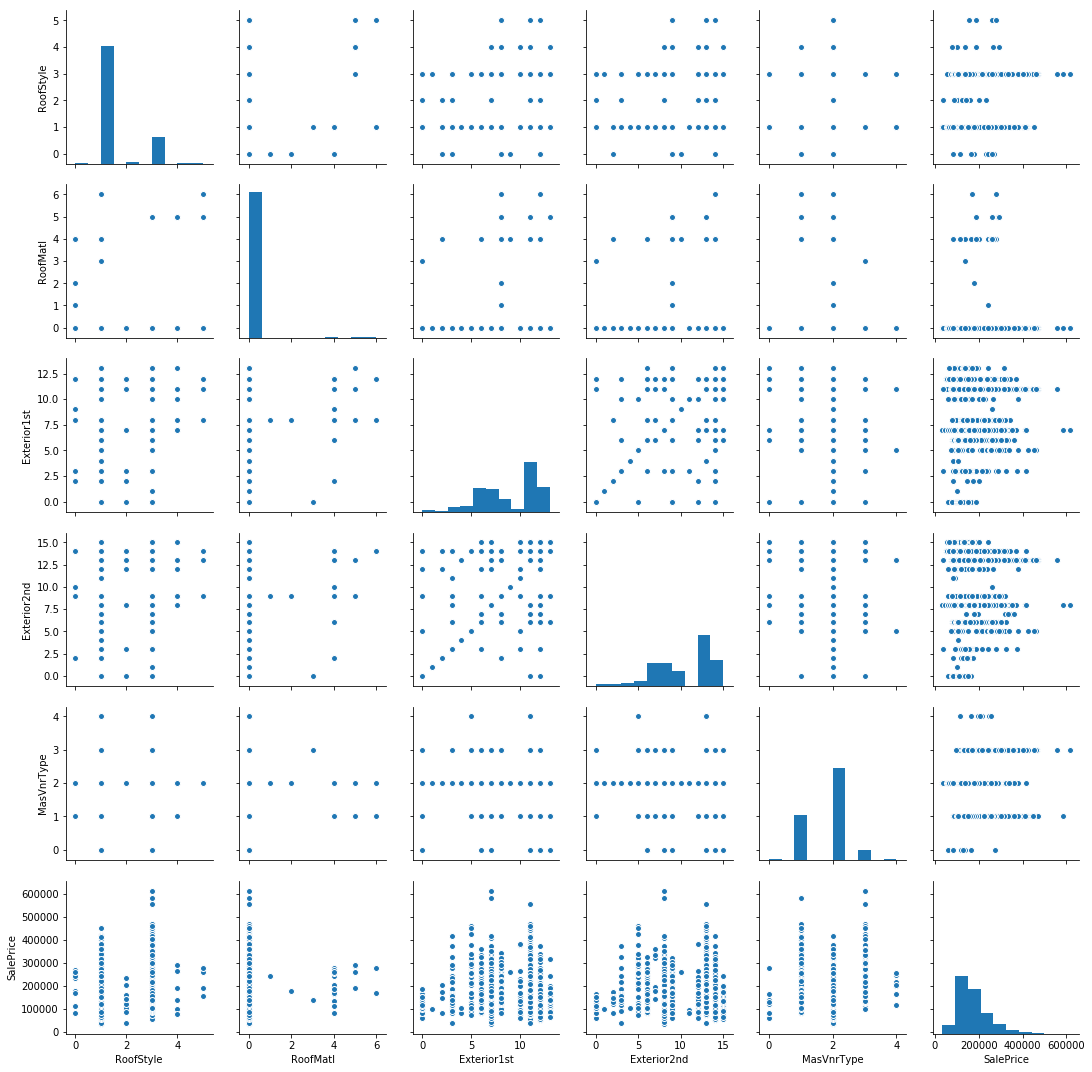

In [111]:
# rest of property features
property_columns = ['RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',target]
ax = sns.pairplot(df_categorical[property_columns])

In [112]:
df = df_categorical[property_columns]
df.corr()

,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,SalePrice
RoofStyle,1.000000,0.031558,-0.030942,-0.051885,-0.104573,0.182504
RoofMatl,0.031558,1.000000,-0.001243,-0.004156,-0.035679,0.059851
Exterior1st,-0.030942,-0.001243,1.000000,0.848885,0.028645,0.131319
Exterior2nd,-0.051885,-0.004156,0.848885,1.000000,0.048383,0.128333
MasVnrType,-0.104573,-0.035679,0.028645,0.048383,1.000000,-0.099263
SalePrice,0.182504,0.059851,0.131319,0.128333,-0.099263,1.000000


It seems that Exterior1st and Exterior2nd have high correlation to each other. I'll drop Exterior2nd.

,SaleType,SalePrice
SaleType,1.000000,0.086572
SalePrice,0.086572,1.000000


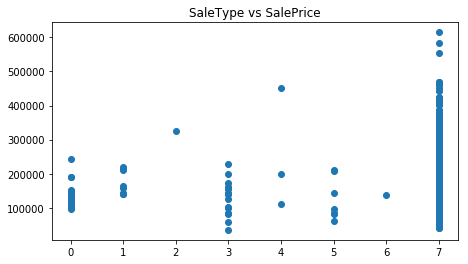

In [113]:
col1 = 'SaleType'
df = df_categorical[[col1, target]]

show_corr(col1, col1, target)
df.corr()

##### 3.3.8. Features Interaction - Enclosure 

In [114]:
# Although the OverallQCGrp and BsmtQCGrp interaction-manipulations I performed earlier seemed like a good idea, 
# the later prediction results showed the opposite. So I choosed not to use them eventually.
# X_all['OverallQC'] = X_all.OverallQual - 1/X_all.OverallCond
# X_all['OverallQCGrp_ord'] = X_all['OverallQC'].apply(calc_OverallQC_group)
# X_all.drop(columns=['OverallQual','OverallCond','OverallQC'], inplace=True)

# X_all['BsmtQC'] = X_all.BsmtQual_ord - 1/X_all.BsmtCond_ord
# X_all['BsmtQCGrp_ord'] = X_all['BsmtQC'].apply(calc_BsmtQC_group)
# X_all.drop(columns=['BsmtQual_ord','BsmtCond_ord','BsmtQC'], inplace=True)

X_all.drop(columns=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], inplace=True)

X_all['AllAreasSF'] = X_all['TotalBsmtSF'] + X_all['GrLivArea'] + X_all['GarageArea'] + X_all['WoodDeckSF']
X_all.drop(columns=['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'TotalBsmtSF', 
                    'GarageArea', 'WoodDeckSF', 'PoolArea'], inplace=True)

X_all['FrstScndFlrSF'] = X_all['1stFlrSF'] + X_all['2ndFlrSF']
X_all.drop(columns=['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea'], inplace=True)

X_all.drop(columns=['GarageYrBlt'], inplace=True)

X_all.drop(columns=['YrSold', 'MoSold'], inplace=True)

X_all.drop(columns=['Exterior2nd'], inplace=True)

In [115]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2412 entries, 0 to 2411
Data columns (total 61 columns):
MSSubClass          2412 non-null int64
MSZoning            2412 non-null object
LotFrontage         2412 non-null float64
LotArea             2412 non-null int64
Street              2412 non-null object
Alley               2412 non-null object
LandContour         2412 non-null object
LotConfig           2412 non-null object
Neighborhood        2412 non-null object
Condition1          2412 non-null object
Condition2          2412 non-null object
BldgType            2412 non-null object
HouseStyle          2412 non-null object
OverallQual         2412 non-null int64
OverallCond         2412 non-null int64
YearBuilt           2412 non-null int64
YearRemodAdd        2412 non-null int64
RoofStyle           2412 non-null object
RoofMatl            2412 non-null object
Exterior1st         2412 non-null object
MasVnrType          2412 non-null object
MasVnrArea          2412 non-null flo

### 3.4 Skewing

In [116]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [117]:
new_train_csv = pd.concat([X_all.iloc[:train_len], train_csv['SalePrice']], axis=1)
new_train_csv.shape

(1616, 62)

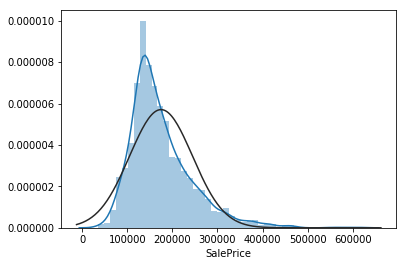

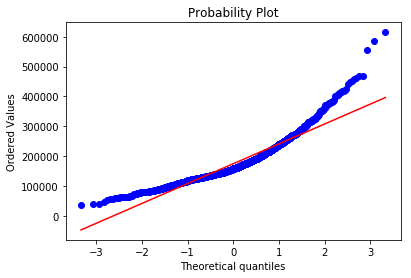

In [118]:
sns.distplot(new_train_csv['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(new_train_csv['SalePrice'], plot=plt)

It is noticeable that SalePrice has a positive skewness. As I understood from a few other kaggle kernels, if the dataset is skewed, then the ML model wouldn’t be able to do a good job of prediction. So I'll transform the target variable and make it more normally distributed, using the log1p transformation. 

In [119]:
skew(new_train_csv.SalePrice)

1.4757808235644267

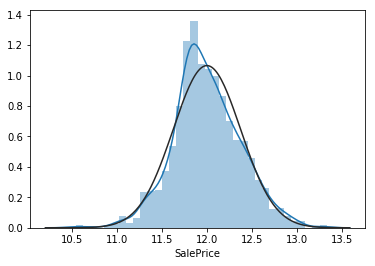

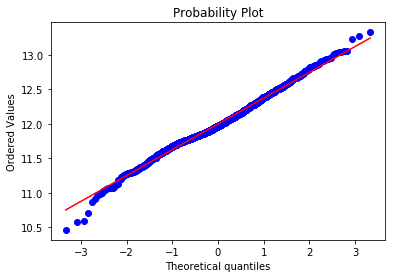

In [120]:
# applying log transformation
new_train_csv['SalePrice'] = np.log1p(new_train_csv['SalePrice'].clip_lower(0))

# transformed histogram and normal probability plot
sns.distplot(new_train_csv['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(new_train_csv['SalePrice'], plot=plt)

The skew seems now corrected and the data appears more normally distributed.

In [121]:
new_train_csv.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,...,BsmtFinType1_ord,BsmtFinType2_ord,Electrical_ord,Functional_ord,GarageFinish_ord,PavedDrive_ord,Fence_ord,AllAreasSF,FrstScndFlrSF,SalePrice
0,120,RL,50.0,7175,Pave,NA,Lvl,Inside,SawyerW,Norm,...,1,1,4,7,2,2,0,3206.0,1332,11.884496
1,120,RH,34.0,4058,Pave,NA,Lvl,Inside,NAmes,Norm,...,6,2,4,7,3,2,0,1977.0,767,11.798112
2,160,RM,24.0,2522,Pave,NA,Lvl,Inside,Edwards,Norm,...,1,1,4,3,1,2,0,3059.0,1709,11.775297
3,60,RL,60.0,21930,Pave,NA,Lvl,Inside,Gilbert,RRAn,...,1,1,4,7,3,2,0,3042.0,1838,12.165985
4,80,RL,75.0,13860,Pave,NA,Lvl,Inside,NAmes,Norm,...,6,1,4,7,3,2,3,5463.0,2704,12.751303


#### Skewed Features

Since the target variable was transformed, it is required to also transform feature variables that are skewed.

In [123]:
numeric_features = X_all.dtypes[X_all.dtypes != "object"].index

# Check the skew of all numerical features
skewness = X_all[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
print(f'Skew in numerical features:\n{skewness}')

# deafault threshold (to be updated soon)
skew_threshold = 0.0

# transformation will apply where abs(skew) > skew_threshold
skewness = skewness[abs(skewness) > skew_threshold]
print(f'\nThese features will be transformed:\n{skewness}')

skew_features = np.log1p(X_all[skewness.index].clip_lower(0))

Skew in numerical features:
MiscVal             20.670455
PoolQC_ord          18.352312
LotArea             13.399658
KitchenAbvGr         4.677565
BsmtHalfBath         3.727559
BsmtFinType2_ord     2.943804
MasVnrArea           2.719520
Fence_ord            1.657059
ExterCond_ord        1.376532
MSSubClass           1.344512
BsmtExposure_ord     1.205697
LotFrontage          1.145875
FrstScndFlrSF        0.858645
ExterQual_ord        0.809420
Fireplaces           0.739129
AllAreasSF           0.677819
HalfBath             0.664832
TotRmsAbvGrd         0.648747
OverallCond          0.630134
BsmtFullBath         0.489646
KitchenQual_ord      0.396986
FullBath             0.241216
GarageFinish_ord     0.211342
BedroomAbvGr         0.184826
OverallQual          0.174519
FireplaceQu_ord      0.171539
GarageCars          -0.171229
BsmtFinType1_ord    -0.208353
YearRemodAdd        -0.418457
HeatingQC_ord       -0.484574
YearBuilt           -0.585694
LotShape_ord        -1.234474
BsmtQual_ord

In [124]:
skew_features.shape

(2412, 41)

In [125]:
skew_features.head()

,MiscVal,PoolQC_ord,LotArea,KitchenAbvGr,BsmtHalfBath,BsmtFinType2_ord,MasVnrArea,Fence_ord,ExterCond_ord,MSSubClass,...,LotShape_ord,BsmtQual_ord,PavedDrive_ord,GarageQual_ord,GarageCond_ord,BsmtCond_ord,Electrical_ord,Functional_ord,LandSlope_ord,Utilities_ord
0,0.0,0.0,8.878497,0.693147,0.0,0.693147,0.000000,0.000000,1.386294,4.795791,...,1.386294,1.609438,1.098612,1.386294,1.386294,1.386294,1.609438,2.079442,1.098612,1.386294
1,0.0,0.0,8.308692,0.693147,0.0,1.098612,5.209486,0.000000,1.386294,4.795791,...,1.386294,1.609438,1.098612,1.386294,1.386294,1.386294,1.609438,2.079442,1.098612,1.386294
2,0.0,0.0,7.833204,0.693147,0.0,0.693147,3.931826,0.000000,1.386294,5.081404,...,1.386294,1.609438,1.098612,1.386294,1.386294,1.386294,1.609438,1.386294,1.098612,1.386294
3,0.0,0.0,9.995656,0.693147,0.0,0.693147,0.000000,0.000000,1.386294,4.110874,...,0.000000,1.609438,1.098612,1.386294,1.386294,1.609438,1.609438,2.079442,1.098612,1.386294
4,0.0,0.0,9.536834,0.693147,0.0,0.693147,0.000000,1.386294,1.386294,4.394449,...,1.386294,1.609438,1.098612,1.386294,1.386294,1.386294,1.609438,2.079442,1.098612,1.386294


In [126]:
new_skewness = skew_features.apply(lambda x: skew(x)).sort_values(ascending=False)

In [127]:
df = pd.concat([skewness, new_skewness], axis=1)
df['improve'] = abs(df[0]) >= abs(df[1])
df

,0,1,improve
AllAreasSF,0.677819,-0.505620,True
BedroomAbvGr,0.184826,-1.072834,False
BsmtCond_ord,-3.631158,-4.951540,False
BsmtExposure_ord,1.205697,0.611642,True
BsmtFinType1_ord,-0.208353,-0.639968,False
BsmtFinType2_ord,2.943804,1.748150,True
BsmtFullBath,0.489646,0.370991,True
BsmtHalfBath,3.727559,3.676399,True
BsmtQual_ord,-1.377530,-3.554902,False
Electrical_ord,-4.089408,-4.921459,False


In [128]:
# setting the threshold to a new value
skew_threshold = 0.22

# transformation will apply where skew > skew_threshold (no abs() required)
skewness = skewness[skewness > skew_threshold]
skew_features = np.log1p(X_all[skewness.index])

In [129]:
new_skewness = skew_features.apply(lambda x: skew(x)).sort_values(ascending=False)
skew_features.shape

(2412, 22)

In [130]:
df = pd.concat([skewness, new_skewness], axis=1)
df['improve'] = abs(df[0]) >= abs(df[1])
df

,0,1,improve
AllAreasSF,0.677819,-0.505620,True
BsmtExposure_ord,1.205697,0.611642,True
BsmtFinType2_ord,2.943804,1.748150,True
BsmtFullBath,0.489646,0.370991,True
BsmtHalfBath,3.727559,3.676399,True
ExterCond_ord,1.376532,0.342657,True
ExterQual_ord,0.809420,0.537316,True
Fence_ord,1.657059,1.517056,True
Fireplaces,0.739129,0.228234,True
FrstScndFlrSF,0.858645,-0.065178,True


In [131]:
X_all[new_skewness.index] = np.log1p(X_all[new_skewness.index].clip_lower(0))

In [132]:
X_all.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,...,BsmtExposure_ord,BsmtFinType1_ord,BsmtFinType2_ord,Electrical_ord,Functional_ord,GarageFinish_ord,PavedDrive_ord,Fence_ord,AllAreasSF,FrstScndFlrSF
0,4.795791,RL,3.931826,8.878497,Pave,NA,Lvl,Inside,SawyerW,Norm,...,0.693147,1,0.693147,4,7,2,2,0.000000,8.073091,7.195187
1,4.795791,RH,3.555348,8.308692,Pave,NA,Lvl,Inside,NAmes,Norm,...,1.386294,6,1.098612,4,7,3,2,0.000000,7.589842,6.643790
2,5.081404,RM,3.218876,7.833204,Pave,NA,Lvl,Inside,Edwards,Norm,...,0.693147,1,0.693147,4,3,1,2,0.000000,8.026170,7.444249
3,4.110874,RL,4.110874,9.995656,Pave,NA,Lvl,Inside,Gilbert,RRAn,...,1.386294,1,0.693147,4,7,3,2,0.000000,8.020599,7.516977
4,4.394449,RL,4.330733,9.536834,Pave,NA,Lvl,Inside,NAmes,Norm,...,1.609438,6,0.693147,4,7,3,2,1.386294,8.605936,7.902857


### 3.5 Feature selection

#### 3.5.1. Dropping features with low variance
In order to reduce dimensions, I will now drop columns which have a 'dominant' value. If a value's portion in a certain column is dominant_value_percentage or more, this column will probably won't contribute towards explaining the target variable, and therefore will be dropped from the DF.

In [133]:
dominant_value_percentage = 0.9

In [134]:
max_colname_len = max([len(col) for col in X_all])

for col in X_all:
    value = list(X_all[col].value_counts(normalize=True, sort=True, ascending=False).keys())[0]
    portion = list(X_all[col].value_counts(normalize=True, sort=True, ascending=False))[0]
    if portion >= dominant_value_percentage:
        print(f'Column {col:{max_colname_len}} was dropped. The portion of the value {value} was {portion:.3f}')
        X_all.drop(columns=col, inplace=True)
        
X_all.shape

Column Street           was dropped. The portion of the value Pave was 0.996
Column Alley            was dropped. The portion of the value NA was 0.936
Column LandContour      was dropped. The portion of the value Lvl was 0.905
Column Condition2       was dropped. The portion of the value Norm was 0.991
Column RoofMatl         was dropped. The portion of the value CompShg was 0.987
Column Heating          was dropped. The portion of the value GasA was 0.984
Column CentralAir       was dropped. The portion of the value Y was 0.937
Column BsmtHalfBath     was dropped. The portion of the value 0.0 was 0.939
Column KitchenAbvGr     was dropped. The portion of the value 0.6931471805599453 was 0.959
Column MiscFeature      was dropped. The portion of the value NA was 0.960
Column MiscVal          was dropped. The portion of the value 0.0 was 0.961
Column SaleType         was dropped. The portion of the value WD  was 0.964
Column GarageCond_ord   was dropped. The portion of the value 3 was 0.

(2412, 42)

## 4. get_dummy

I will prepare in advance 2 sets of data with dummies, as some of the models will perform better with get_dummies on ordinal features as well as on the categorical features.

In [135]:
# converting MSSubClass (the type of dwelling) from numeric to string   
X_all['MSSubClass'] = X_all['MSSubClass'].apply(str)

X_all_cat_only = pd.get_dummies(X_all)
# drop dummy columns which represent 'Unknown' (missing) values
X_all_cat_only.drop(columns=[col for col in X_all_cat_only.columns if col[-7:] == 'Unknown'], inplace=True)

dummies_feature = [col for col in X_all.columns if col[-3:] == 'ord']
dummies_feature.extend(X_all.dtypes[X_all.dtypes == "object"].index.tolist())
X_all_cat_and_ord = pd.get_dummies(X_all, columns=dummies_feature)
# drop dummy columns which represent 'Unknown' (missing) values
X_all_cat_and_ord.drop(columns=[col for col in X_all_cat_and_ord.columns if col[-7:] == 'Unknown'], inplace=True)    

## 5. Modeling

In [136]:
# Model Evaluation
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

In [138]:
y = new_train_csv['SalePrice']

In [140]:
def calc_results(GS_best, X_train, X_test, y_train, y_test):
    y_train_pred = GS_best.predict(X_train)
    y_test_pred = GS_best.predict(X_test)
        
    # transforming y back into "original" values (inverse of log1p)
    orig_y_train = np.expm1(y_train).round().astype(int)
    orig_y_train_pred = np.expm1(y_train_pred).round().astype(int)
    orig_y_test = np.expm1(y_test).round().astype(int)
    orig_y_test_pred = np.expm1(y_test_pred).round().astype(int)
        
    rmsle_train = rmsle(orig_y_train, orig_y_train_pred)
    rmsle_test = rmsle(orig_y_test, orig_y_test_pred)

    return (GS_best, orig_y_train_pred, orig_y_test_pred, rmsle_train, rmsle_test)

### 5.1. Linear Regression

In [141]:
X = X_all_cat_only.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {}
steps = [('reg_model', LinearRegression())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

LR_GS_best = grid_search.best_estimator_

results_LR_GS_best = calc_results(LR_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_LR_GS_best[0]}\n \
rmsle_train: {results_LR_GS_best[-2]}\n \
rmsle_test: {results_LR_GS_best[-1]}')


model: Pipeline(memory=None,
     steps=[('reg_model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])
 rmsle_train: 0.0844858335225436
 rmsle_test: 0.09587339338799288


### 5.2. Lasso

In [142]:
X = X_all_cat_and_ord.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {
              'reg_model__alpha': [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.01],
              'reg_model__max_iter': [50000]
             }

steps = [('reg_model', Lasso())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

Lasso_GS_best = grid_search.best_estimator_

results_Lasso_GS_best = calc_results(Lasso_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_Lasso_GS_best[0]}\n \
rmsle_train: {results_Lasso_GS_best[-2]}\n \
rmsle_test: {results_Lasso_GS_best[-1]}')


model: Pipeline(memory=None,
     steps=[('reg_model', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])
 rmsle_train: 0.08825828889077733
 rmsle_test: 0.0895093741044916


### 5.3. Ridge

In [143]:
X = X_all_cat_and_ord.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {
              'reg_model__alpha': np.arange(1, 10, 0.5),
              'reg_model__max_iter': [50000]
             }

steps = [('reg_model', Ridge())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

Ridge_GS_best = grid_search.best_estimator_

results_Ridge_GS_best = calc_results(Ridge_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_Ridge_GS_best[0]}\n \
rmsle_train: {results_Ridge_GS_best[-2]}\n \
rmsle_test: {results_Ridge_GS_best[-1]}')


model: Pipeline(memory=None,
     steps=[('reg_model', Ridge(alpha=4.5, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, random_state=None, solver='auto', tol=0.001))])
 rmsle_train: 0.08363740537929674
 rmsle_test: 0.08926718953713994


### 5.4. RandomForest

In [144]:
X = X_all_cat_only.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {
              'reg_model__n_estimators': [10],
              'reg_model__max_features': ['auto', 20, 0.2],              
              'reg_model__min_samples_leaf': [10, 20, 30], 
              'reg_model__n_jobs': [-1],
              'reg_model__bootstrap': [True],
              'reg_model__oob_score': [False, True]
              }

steps = [('reg_model', RandomForestRegressor())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

RF_GS_best = grid_search.best_estimator_

results_RF_GS_best = calc_results(RF_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_RF_GS_best[0]}\n \
rmsle_train: {results_RF_GS_best[-2]}\n \
rmsle_test: {results_RF_GS_best[-1]}')


model: Pipeline(memory=None,
     steps=[('reg_model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False))])
 rmsle_train: 0.10449915192849041
 rmsle_test: 0.12687397844215156


### 5.5. GradientBoosting

In [145]:
X = X_all_cat_only.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {
              'reg_model__n_estimators': [100],
              'reg_model__learning_rate': [0.05],
              'reg_model__max_features': ['auto', 15, 20, 0.2],              
              'reg_model__min_samples_leaf': [20, 30, 40, 50]
              }

steps = [('reg_model', GradientBoostingRegressor())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

GB_GS_best = grid_search.best_estimator_

results_GB_GS_best = calc_results(GB_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_GB_GS_best[0]}\n \
rmsle_train: {results_GB_GS_best[-2]}\n \
rmsle_test: {results_GB_GS_best[-1]}')



model: Pipeline(memory=None,
     steps=[('reg_model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=0.2,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))])
 rmsle_train: 0.09157347516519541
 rmsle_test: 0.10251222077770625


### 5.6. KNN

In [146]:
X = X_all_cat_and_ord.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {
              'reg_model__n_neighbors': range(10,20),
              'reg_model__p': [1]
             }

steps = [('reg_model', KNeighborsRegressor())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

KNN_GS_best = grid_search.best_estimator_

results_KNN_GS_best = calc_results(KNN_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_KNN_GS_best[0]}\n \
rmsle_train: {results_KNN_GS_best[-2]}\n \
rmsle_test: {results_KNN_GS_best[-1]}')



model: Pipeline(memory=None,
     steps=[('reg_model', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=1,
          weights='uniform'))])
 rmsle_train: 0.15902154480764139
 rmsle_test: 0.17027441490810316


### 5.7. SVR

In [147]:
X = X_all_cat_only.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {
              'reg_model__C': range(1, 10)
             }

steps = [('reg_model', SVR())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

SVR_GS_best = grid_search.best_estimator_

results_SVR_GS_best = calc_results(SVR_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_SVR_GS_best[0]}\n \
rmsle_train: {results_SVR_GS_best[-2]}\n \
rmsle_test: {results_SVR_GS_best[-1]}')



model: Pipeline(memory=None,
     steps=[('reg_model', SVR(C=3, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])
 rmsle_train: 0.07965681501224049
 rmsle_test: 0.13553663688499049


### 5.8. ElasticNet

In [148]:
X = X_all_cat_and_ord.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

param_grid = {
              'reg_model__alpha': np.arange(0.0002, 0.002, 0.0001),
              'reg_model__l1_ratio': np.arange(0.1, 1, 0.1)
             }

steps = [('reg_model', ElasticNet())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X_train, y_train)

EN_GS_best = grid_search.best_estimator_

results_EN_GS_best = calc_results(EN_GS_best, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_EN_GS_best[0]}\n \
rmsle_train: {results_EN_GS_best[-2]}\n \
rmsle_test: {results_EN_GS_best[-1]}')


model: Pipeline(memory=None,
     steps=[('reg_model', ElasticNet(alpha=0.0006000000000000001, copy_X=True, fit_intercept=True,
      l1_ratio=0.8, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False))])
 rmsle_train: 0.08809878613710391
 rmsle_test: 0.08945999474657393


### 5.9. Ensemble - BaggingRegressor

#### 5.9.1.  Bagging / Lasso

In [149]:
X = X_all_cat_and_ord.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

bagging_Lasso_estimator = BaggingRegressor(base_estimator=Lasso(alpha=0.0002, max_iter=1000),
                                           n_estimators=500,
                                           max_samples=500
                                          )

bagging_Lasso_estimator.fit(X_train, y_train)

results_bagging_Lasso_estimator = calc_results(bagging_Lasso_estimator, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_bagging_Lasso_estimator[0]}\n \
rmsle_train: {results_bagging_Lasso_estimator[-2]}\n \
rmsle_test: {results_bagging_Lasso_estimator[-1]}')



model: BaggingRegressor(base_estimator=Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=500, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
 rmsle_train: 0.0838341591075224
 rmsle_test: 0.08806939230909187


#### 5.9.2. Bagging / Ridge

In [150]:
X = X_all_cat_and_ord.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

bagging_Ridge_estimator = BaggingRegressor(base_estimator=Ridge(alpha=2, max_iter=1000), 
                                           n_estimators=500,
                                           max_samples=500
                                          )

bagging_Ridge_estimator.fit(X_train, y_train)

results_bagging_Ridge_estimator = calc_results(bagging_Ridge_estimator, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_bagging_Ridge_estimator[0]}\n \
rmsle_train: {results_bagging_Ridge_estimator[-2]}\n \
rmsle_test: {results_bagging_Ridge_estimator[-1]}')



model: BaggingRegressor(base_estimator=Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=500, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
 rmsle_train: 0.08535238221712704
 rmsle_test: 0.08903049114119194


#### 5.9.3. Bagging / RF

In [151]:
X = X_all_cat_only.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

bagging_RF_estimator = BaggingRegressor(base_estimator=RandomForestRegressor(
                                                                             n_estimators=50,
                                                                             max_features=0.2,              
                                                                             min_samples_leaf=5, 
                                                                             n_jobs=-1
                                                                            ),
                                        )

bagging_RF_estimator.fit(X_train, y_train)

results_bagging_RF_estimator = calc_results(bagging_RF_estimator, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_bagging_RF_estimator[0]}\n \
rmsle_train: {results_bagging_RF_estimator[-2]}\n \
rmsle_test: {results_bagging_RF_estimator[-1]}')



model: BaggingRegressor(base_estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.2, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
 rmsle_train: 0.10451828741669247
 rmsle_test: 0.11461771425221283


#### 5.9.4. Bagging / GB

In [152]:
X = X_all_cat_only.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

bagging_GB_estimator = BaggingRegressor(base_estimator=GradientBoostingRegressor(
                                                                                 n_estimators=100,
                                                                                 learning_rate=0.05,
                                                                                 min_samples_leaf=20
                                                                                ),
                                        )

bagging_GB_estimator.fit(X_train, y_train)

results_bagging_GB_estimator = calc_results(bagging_GB_estimator, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_bagging_GB_estimator[0]}\n \
rmsle_train: {results_bagging_GB_estimator[-2]}\n \
rmsle_test: {results_bagging_GB_estimator[-1]}')



model: BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
 rmsle_train: 0.09244482448998499
 rmsle_test: 0.10307851286668891


#### 5.9.5. Bagging / EN

In [153]:
X = X_all_cat_and_ord.iloc[:train_len]
# X = X_all.iloc[:train_len]
# X = get_dummies_ord(X, True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1709)

bagging_EN_estimator = BaggingRegressor(base_estimator=ElasticNet(    
                                                                  alpha=0.001,
                                                                  l1_ratio=0.3
                                                                 ),
                                       )

bagging_EN_estimator.fit(X_train, y_train)

results_bagging_EN_estimator = calc_results(bagging_EN_estimator, X_train, X_test, y_train, y_test)
print(f'\nmodel: {results_bagging_EN_estimator[0]}\n \
rmsle_train: {results_bagging_EN_estimator[-2]}\n \
rmsle_test: {results_bagging_EN_estimator[-1]}')



model: BaggingRegressor(base_estimator=ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
 rmsle_train: 0.08663314457980023
 rmsle_test: 0.08841290278811652


### 5.10. Averaging models

#### Train dataset

In [154]:
# I've tried several combinations, to achieve best results

models_train_results = {
#     'LR':       results_LR_GS_best[1],
    'Lasso':    results_Lasso_GS_best[1],
#     'Ridge':    results_Ridge_GS_best[1],
#     'RF':       results_RF_GS_best[1],
#     'GB':       results_GB_GS_best[1],
#     'KNN':      results_KNN_GS_best[1],
#     'SVR':      results_SVR_GS_best[1],
    'EN':       results_EN_GS_best[1],
#     'BG_Lasso': results_bagging_Lasso_estimator[1],
    'BG_Ridge': results_bagging_Ridge_estimator[1],
#     'BG_RF':    results_bagging_RF_estimator[1],
    'BG_GB':    results_bagging_GB_estimator[1],
    'BG_EN':    results_bagging_EN_estimator[1]
                       }

In [156]:
models_train_results_df = pd.DataFrame(data = models_train_results)
models_train_results_df['AvgTrainPredict'] = models_train_results_df.mean(axis=1).round().astype(int)

In [157]:
models_train_results_df.head()

,Lasso,EN,BG_Ridge,BG_GB,BG_EN,AvgTrainPredict
0,115384,115391,116187,121416,114295,116535
1,104195,104214,105560,106251,105195,105083
2,208744,208685,204756,209348,208206,207948
3,231921,231962,232728,222844,231580,230207
4,153217,153450,157757,159735,155649,155962


In [158]:
# models_train_results_df.describe()

In [159]:
orig_y_train = np.expm1(y_train).round().astype(int)
rmsle_models_train_results = rmsle(orig_y_train, models_train_results_df.AvgTrainPredict)
print(f'rmsle_avg_train: {rmsle_models_train_results}')

rmsle_avg_train: 0.08456162904943156


#### Test dataset

In [160]:
models_test_results = {
#     'LR':       results_LR_GS_best[2],
    'Lasso':    results_Lasso_GS_best[2],
#     'Ridge':    results_Ridge_GS_best[2],
#     'RF':       results_RF_GS_best[2],
#     'GB':       results_GB_GS_best[2],
#     'KNN':      results_KNN_GS_best[2],
#     'SVR':      results_SVR_GS_best[2],
    'EN':       results_EN_GS_best[2],
#     'BG_Lasso': results_bagging_Lasso_estimator[2],
    'BG_Ridge': results_bagging_Ridge_estimator[2],
#     'BG_RF':    results_bagging_RF_estimator[2],
   'BG_GB':    results_bagging_GB_estimator[2],
    'BG_EN':    results_bagging_EN_estimator[2]
                       }

In [161]:
models_test_results_df = pd.DataFrame(data = models_test_results)
models_test_results_df['AvgTestPredict'] = models_test_results_df.mean(axis=1).round().astype(int)

In [162]:
# models_test_results_df.head()

In [163]:
# models_test_results_df.describe()

In [164]:
orig_y_test = np.expm1(y_test).round().astype(int)
rmsle_models_test_results = rmsle(orig_y_test, models_test_results_df.AvgTestPredict)
print(f'rmsle_avg_test: {rmsle_models_test_results}')

rmsle_avg_test: 0.08716724721723712


## 6. Submission

### 6.1. Fit on complete Kaggle Train dataset

In [165]:
X = X_all_cat_and_ord.iloc[:train_len]

param_grid = {
              'reg_model__alpha': [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.01],
              'reg_model__max_iter': [50000]
             }

steps = [('reg_model', Lasso())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X, y)

Lasso_GS_best = grid_search.best_estimator_

In [166]:
X = X_all_cat_and_ord.iloc[:train_len]

param_grid = {
              'reg_model__alpha': np.arange(0.0002, 0.002, 0.0001),
              'reg_model__l1_ratio': np.arange(0.1, 1, 0.1)
             }

steps = [('reg_model', ElasticNet())]
pipe = pipeline.Pipeline(steps) 
                       
grid_search = GridSearchCV(pipe, param_grid, scoring=rmsle_scorer, cv=10)
grid_search.fit(X, y)

EN_GS_best = grid_search.best_estimator_

In [167]:
X = X_all_cat_and_ord.iloc[:train_len]

bagging_Ridge_estimator = BaggingRegressor(base_estimator=Ridge(alpha=2, max_iter=1000), 
                                           n_estimators=500,
                                           max_samples=500
                                          )

bagging_Ridge_estimator.fit(X, y)

BaggingRegressor(base_estimator=Ridge(alpha=2, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=500, n_estimators=500, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [168]:
X = X_all_cat_only.iloc[:train_len]

bagging_GB_estimator = BaggingRegressor(base_estimator=GradientBoostingRegressor(
                                                                                 n_estimators=100,
                                                                                 learning_rate=0.05,
                                                                                 min_samples_leaf=20
                                                                                ),
                                        )

bagging_GB_estimator.fit(X, y)

BaggingRegressor(base_estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=20,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [169]:
X = X_all_cat_and_ord.iloc[:train_len]

bagging_EN_estimator = BaggingRegressor(base_estimator=ElasticNet(    
                                                                  alpha=0.001,
                                                                  l1_ratio=0.3
                                                                 ),
                                       )

bagging_EN_estimator.fit(X, y)

BaggingRegressor(base_estimator=ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

### 6.2. Predict

In [171]:
X = X_all_cat_only.iloc[train_len:]
# X = get_dummies_ord(X, False)

y_pred_BG_GB = bagging_GB_estimator.predict(X)

In [172]:
X = X_all_cat_and_ord.iloc[train_len:]
# X = get_dummies_ord(X, True)

y_pred_Lasso =    Lasso_GS_best.predict(X)
y_pred_EN =       EN_GS_best.predict(X)
y_pred_BG_Ridge = bagging_Ridge_estimator.predict(X)
y_pred_BG_EN =    bagging_EN_estimator.predict(X)

### 6.3. Averaging

In [173]:
models_predictions = {
    'Lasso':    y_pred_Lasso,
    'EN':       y_pred_EN,
    'BG_Ridge': y_pred_BG_Ridge,
    'BG_GB':    y_pred_BG_GB,
    'BG_EN':    y_pred_BG_EN
                     }

models_predictions_df = pd.DataFrame(data = models_predictions)
models_predictions_df['AvgPredict2Submit'] = models_predictions_df.mean(axis=1)
y_pred_2submit = np.expm1(models_predictions_df['AvgPredict2Submit']).round().astype(int)

In [175]:
models_predictions_df.head()

,Lasso,EN,BG_Ridge,BG_GB,BG_EN,AvgPredict2Submit
0,11.695356,11.696358,11.701154,11.697339,11.690911,11.696224
1,11.715223,11.710403,11.690727,11.766645,11.704295,11.717459
2,11.989023,11.974745,11.941370,11.892913,11.989239,11.957458
3,11.451064,11.450495,11.444364,11.463714,11.459705,11.453868
4,11.805674,11.803008,11.795476,11.756387,11.803581,11.792825


In [176]:
# models_predictions_df.describe()

In [177]:
# y_pred_2submit

### 6.4. Submit

In [178]:
# submission_preds = pd.Series(y_pred_2submit, index=test_csv['Id'])
submission_preds = pd.Series(y_pred_2submit)
submission_preds.name = 'SalePrice'
submission_preds.head()

0    120116
1    122694
2    155975
3     94264
4    132299
Name: SalePrice, dtype: int32

In [179]:
submission_preds = pd.DataFrame({'Id': test_csv['Id'], 'SalePrice': y_pred_2submit})

In [180]:
# submission_preds.to_csv('submission_DV_Sep2018_2nd.csv', index=False)